In [684]:
# Install and Load Required Packages
#installed.packages("forecast")
#installed.packages("ggplot2")
#installed.packages("tseries")
#installed.packages('aTSA')
#installed.packages("dplyr")
#installed.packages("fpp2")
library(ggplot2)
library(forecast)
library(tseries)
library(dplyr)
library(fpp2)
library(aTSA)


# **DATA COLLECTION AND DESCRIPTION**

In [685]:
# Load the Data into the environment
cocoa_price <- read.csv("CocoaPrice.csv")

In [686]:
head(cocoa_price)

,Date,Price
,<chr>,<dbl>
1,1994-10-01,1447.95
2,1994-11-01,1437.05
3,1994-12-01,1399.43
4,1995-01-01,1468.86
5,1995-02-01,1510.55
6,1995-03-01,1484.91


In [687]:
tail(cocoa_price)

,Date,Price
,<chr>,<dbl>
349,2023-10-01,3495.03
350,2023-11-01,3799.15
351,2023-12-01,3897.04
352,2024-01-01,4087.54
353,2024-02-01,5226.12
354,2024-03-01,6510.16


In [688]:
nrow(cocoa_price)

[1] 354

In [689]:
# Display columns names
names(cocoa_price)

[1] "Date"  "Price"

In [690]:
# Convert the Date column to Date format
cocoa_price$Date <- as.Date(cocoa_price$Date, "%Y-%m-%d")

**DATA PREPROCESSING AND EXPLORATORY ANALYSIS** 


In [691]:
# Summary Statistics
summary(cocoa_price)

      Date                Price       
 Min.   :1994-10-01   Min.   : 874.1  
 1st Qu.:2002-02-08   1st Qu.:1396.1  
 Median :2009-06-16   Median :1806.0  
 Mean   :2009-06-16   Mean   :1853.0  
 3rd Qu.:2016-10-24   3rd Qu.:2168.5  
 Max.   :2024-03-01   Max.   :6510.2  

In [692]:
# Set a time series object 'cocoa_price_ts' from the 'Price' column of 'cocoa_price' dataframe from october 1995 to end and with a monthly frequency
cocoa_price_ts <- ts(cocoa_price$Price, start=c(1994, 10), frequency = 12)

**Vital Signs**

In [693]:
# Get the type of data stored in '
typeof(cocoa_price_ts)

[1] "double"

In [694]:
# Get the class of '
class(cocoa_price_ts)

[1] "ts"

In [695]:
# Get the start of '
start(cocoa_price_ts)

[1] 1994   10

In [696]:
# Get the end time of '
end(cocoa_price_ts)

[1] 2024    3

In [697]:
# Get the frequency of '
frequency(cocoa_price_ts)

[1] 12

**Time series data and Visuals**

In [698]:
# Display time series starts from October 1995 to March 2024 
cocoa_price_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,,,,1447.95,1437.05,1399.43
1995,1468.86,1510.55,1484.91,1469.26,1445.32,1437.14,1364.10,1413.00,1396.86,1394.50,1436.50,1378.84
1996,1349.50,1369.81,1338.62,1456.24,1524.09,1537.60,1495.70,1499.86,1476.14,1477.04,1469.33,1474.30
1997,1428.45,1372.70,1523.60,1571.05,1568.29,1688.38,1677.30,1652.14,1769.64,1741.43,1694.80,1737.29
1998,1668.10,1640.85,1719.18,1726.38,1794.35,1721.86,1712.17,1683.62,1687.32,1646.41,1388.52,1288.09
1999,1254.90,1257.40,1206.52,1108.00,998.75,1119.73,1074.77,980.86,1009.86,954.57,893.64,909.14
2000,906.38,874.14,966.70,962.95,1003.68,991.00,996.62,970.35,1013.57,1027.73,936.09,893.75
2001,1031.86,1257.00,1236.73,1212.60,1233.23,1140.10,1123.82,1147.17,1118.85,1197.35,1397.77,1497.00
2002,1567.59,1713.35,1815.35,1770.91,1749.78,1734.60,1881.78,2004.27,2206.19,2246.57,1811.29,1985.00
2003,2055.27,2076.40,1847.48,1774.86,1515.81,1352.76,1372.35,1410.62,1450.73,1265.57,1289.90,1324.14


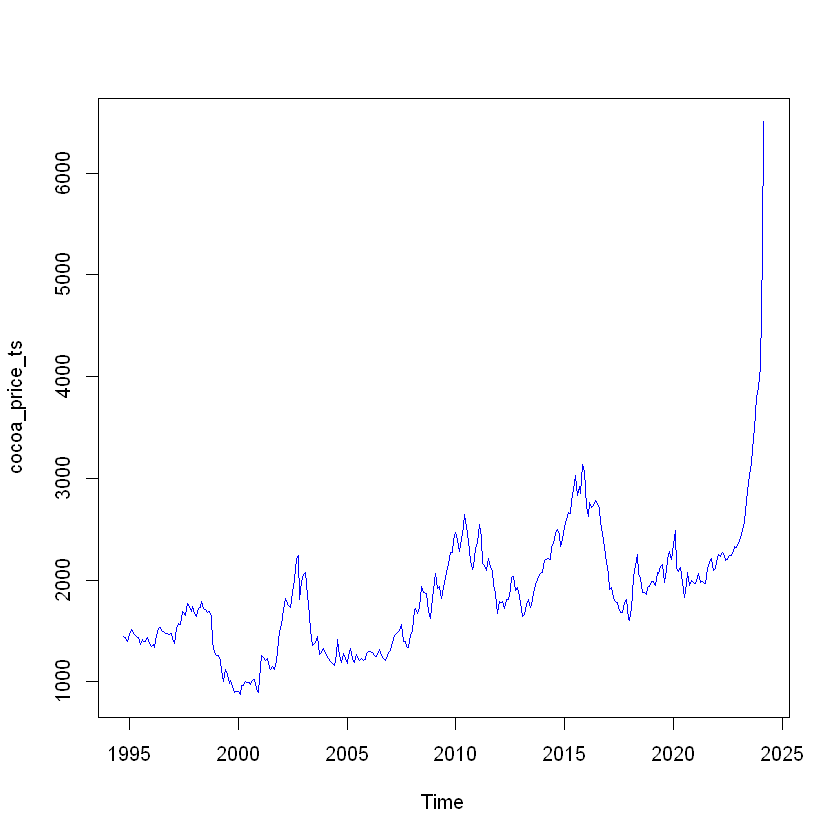

In [699]:
# Plot the time series of cocoa prices
plot(cocoa_price_ts,col='blue')

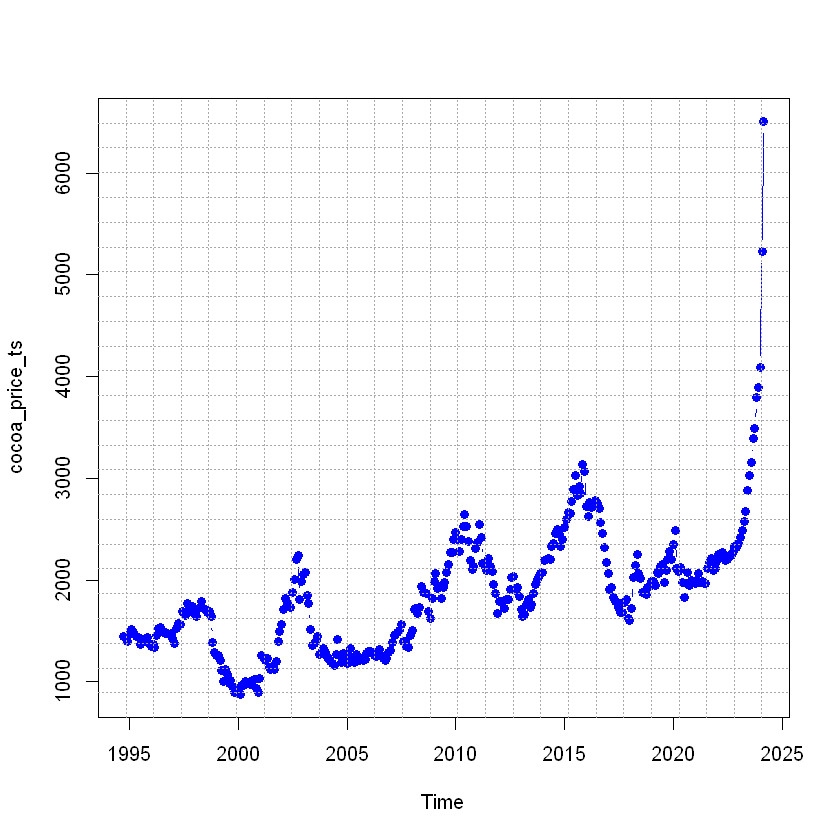

In [700]:
# Plot the time series of cocoa prices with points represented by circles
plot(cocoa_price_ts,  pch=16, type='b', col='blue')
grid(, col='darkgrey', nx=25)

In [701]:
# Extract the time component of '
time(cocoa_price_ts)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,,,,1994.750,1994.833,1994.917
1995,1995.000,1995.083,1995.167,1995.250,1995.333,1995.417,1995.500,1995.583,1995.667,1995.750,1995.833,1995.917
1996,1996.000,1996.083,1996.167,1996.250,1996.333,1996.417,1996.500,1996.583,1996.667,1996.750,1996.833,1996.917
1997,1997.000,1997.083,1997.167,1997.250,1997.333,1997.417,1997.500,1997.583,1997.667,1997.750,1997.833,1997.917
1998,1998.000,1998.083,1998.167,1998.250,1998.333,1998.417,1998.500,1998.583,1998.667,1998.750,1998.833,1998.917
1999,1999.000,1999.083,1999.167,1999.250,1999.333,1999.417,1999.500,1999.583,1999.667,1999.750,1999.833,1999.917
2000,2000.000,2000.083,2000.167,2000.250,2000.333,2000.417,2000.500,2000.583,2000.667,2000.750,2000.833,2000.917
2001,2001.000,2001.083,2001.167,2001.250,2001.333,2001.417,2001.500,2001.583,2001.667,2001.750,2001.833,2001.917
2002,2002.000,2002.083,2002.167,2002.250,2002.333,2002.417,2002.500,2002.583,2002.667,2002.750,2002.833,2002.917
2003,2003.000,2003.083,2003.167,2003.250,2003.333,2003.417,2003.500,2003.583,2003.667,2003.750,2003.833,2003.917


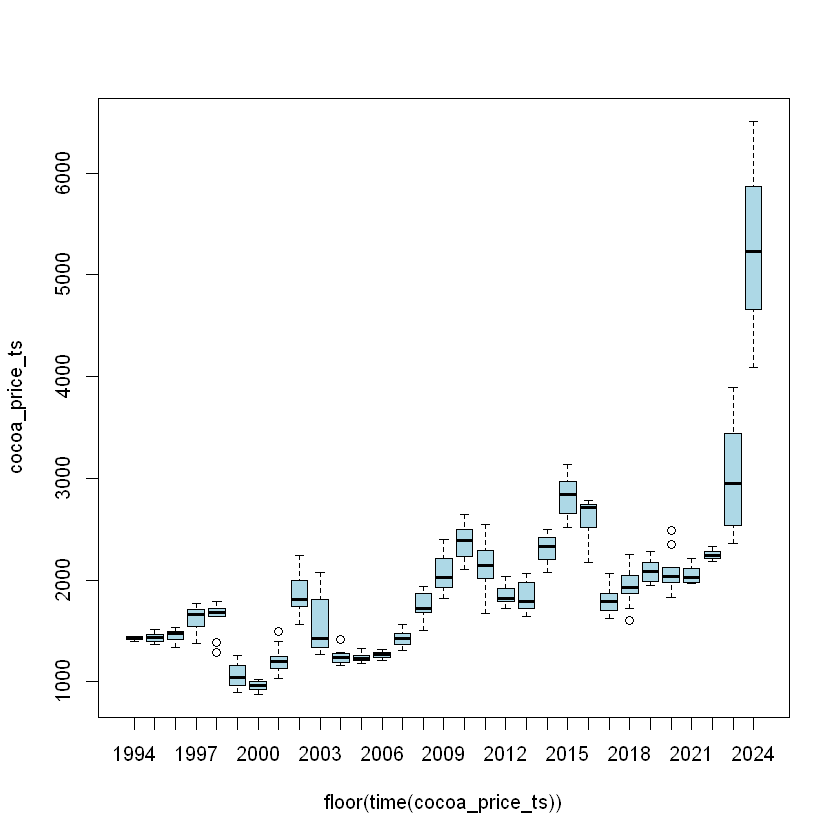

In [702]:
# Create boxplots of cocoa prices grouped by year (floor of time)
boxplot(cocoa_price_ts~floor(time(cocoa_price_ts)), col='lightblue')

In [703]:
# Extract the cycle component in '
cycle(cocoa_price_ts)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,,,,10,11,12
1995,1,2,3,4,5,6,7,8,9,10,11,12
1996,1,2,3,4,5,6,7,8,9,10,11,12
1997,1,2,3,4,5,6,7,8,9,10,11,12
1998,1,2,3,4,5,6,7,8,9,10,11,12
1999,1,2,3,4,5,6,7,8,9,10,11,12
2000,1,2,3,4,5,6,7,8,9,10,11,12
2001,1,2,3,4,5,6,7,8,9,10,11,12
2002,1,2,3,4,5,6,7,8,9,10,11,12
2003,1,2,3,4,5,6,7,8,9,10,11,12


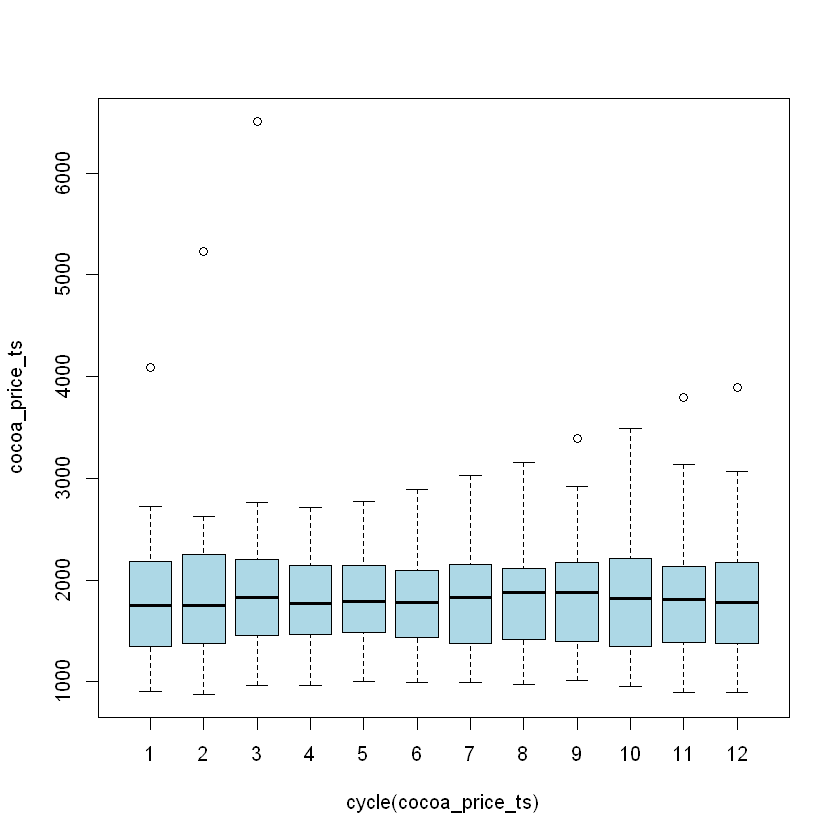

In [704]:
# Create boxplots of cocoa prices grouped by cycle
boxplot(cocoa_price_ts~cycle(cocoa_price_ts), col='lightblue')

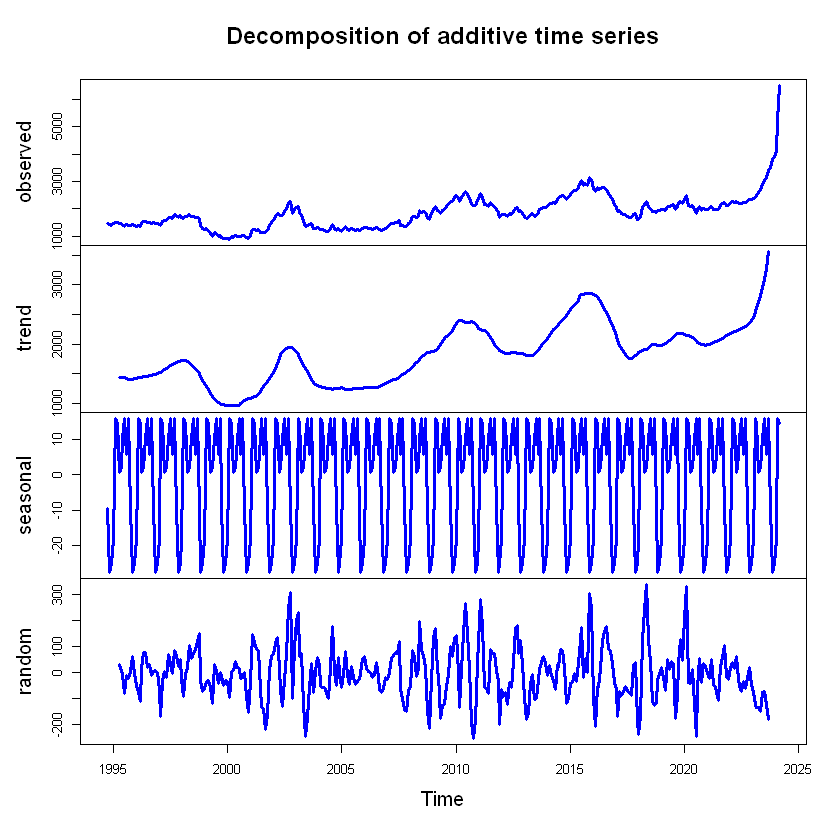

In [705]:
plot(decomposition, col = colors, lwd = 3)

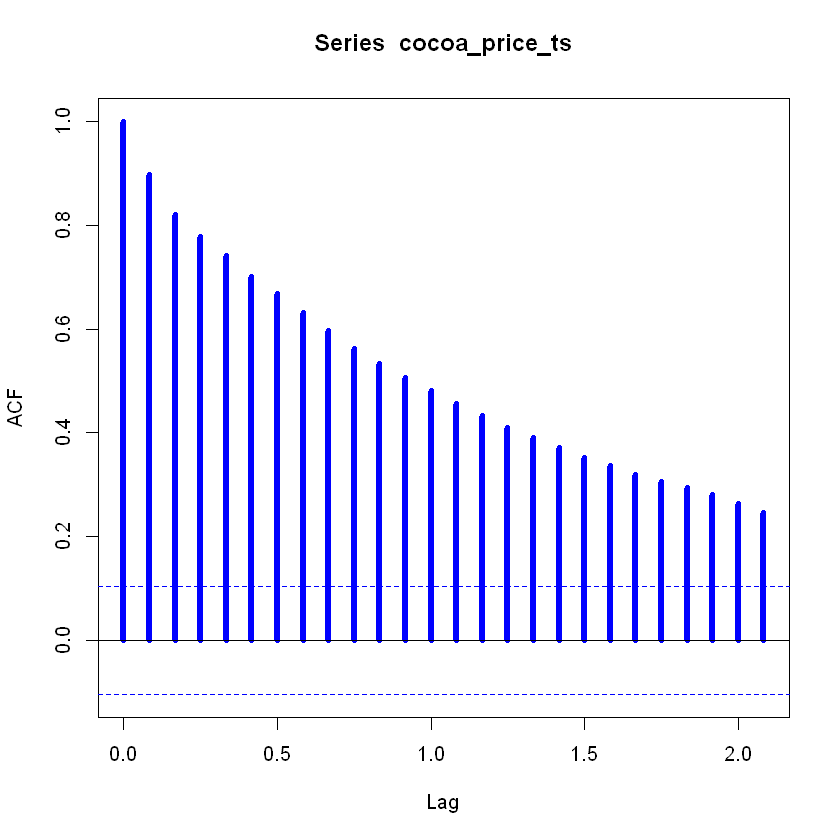

In [706]:
# Autocorrelation Function (ACF) Plot
acf(cocoa_price_ts, col = "blue", lwd = 5)

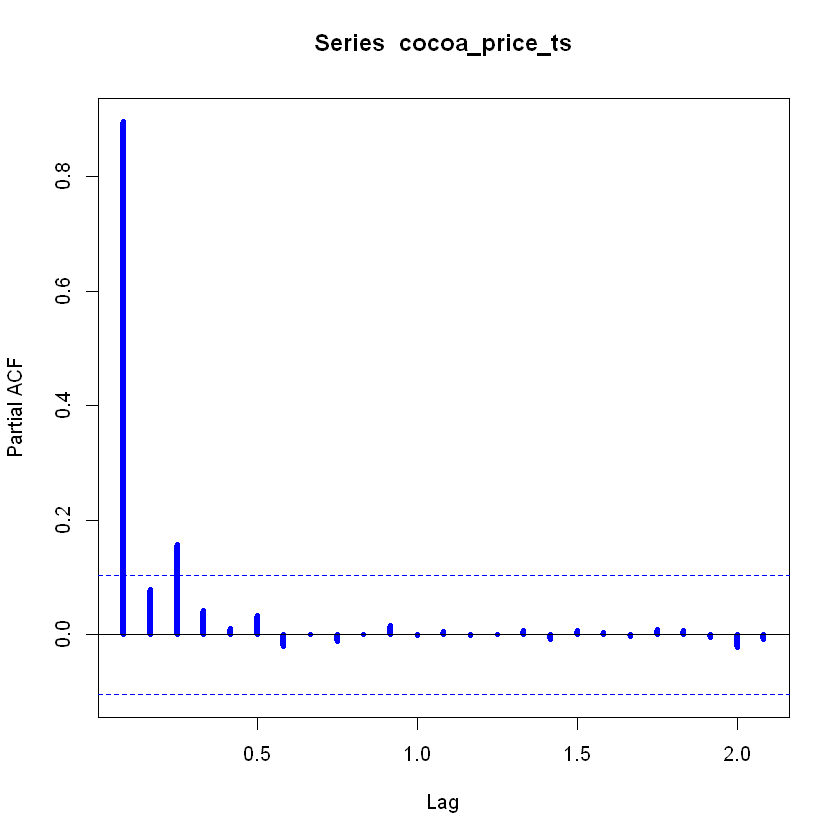

In [707]:
# Partial Autocorrelation Function (PACF) Plot
pacf(cocoa_price_ts, col = "blue", lwd = 5)

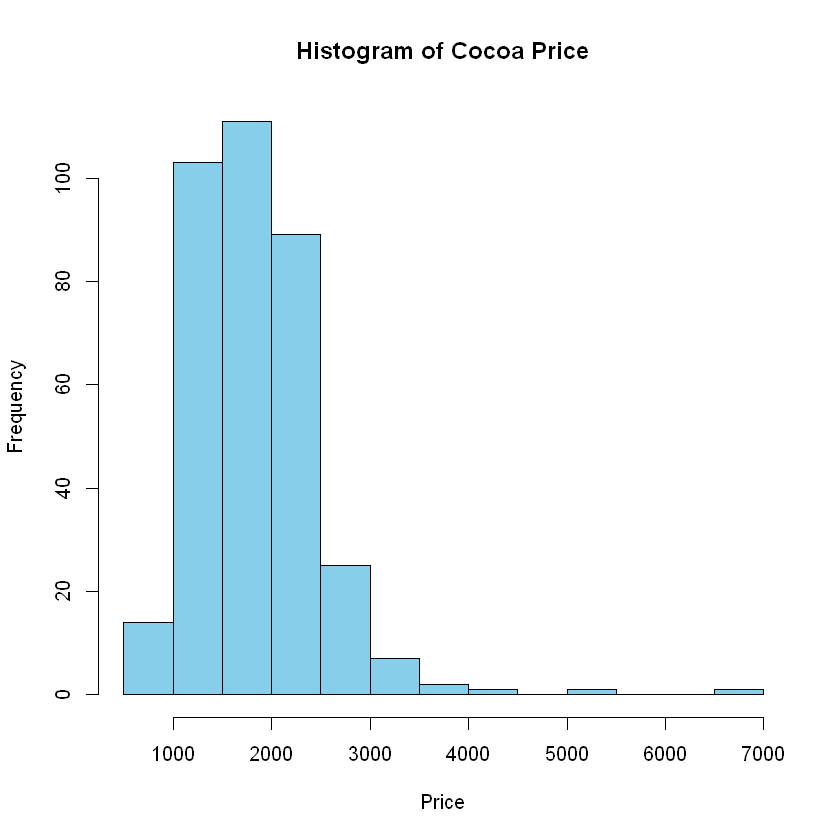

In [708]:
# Histogram Plot: Check the distribution of the data.
hist(cocoa_price$Price, main = "Histogram of Cocoa Price", xlab = "Price", ylab = "Frequency", col = "skyblue")

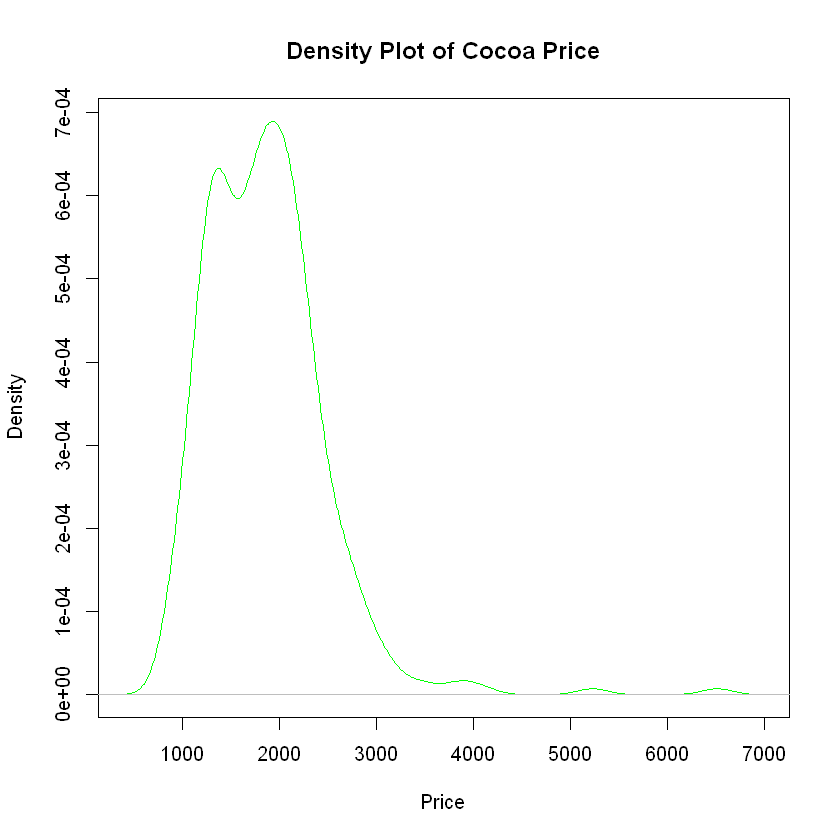

In [709]:
# Density Plot with Color
plot(density(cocoa_price$Price), main = "Density Plot of Cocoa Price", xlab = "Price", ylab = "Density", col = "green")

In [710]:
# Check for missing values
missing_values <- sum(is.na(cocoa_price_ts))
# Print the number of missing values
print(paste("Number of missing values in cocoa_price_ts :", missing_values))

[1] "Number of missing values in cocoa_price_ts : 0"


# **SPLIT INTO TRAIN AND TEST SETS** 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,,,,,,,,,,1394.50,1436.50,1378.84
1996,1349.50,1369.81,1338.62,1456.24,1524.09,1537.60,1495.70,1499.86,1476.14,1477.04,1469.33,1474.30
1997,1428.45,1372.70,1523.60,1571.05,1568.29,1688.38,1677.30,1652.14,1769.64,1741.43,1694.80,1737.29
1998,1668.10,1640.85,1719.18,1726.38,1794.35,1721.86,1712.17,1683.62,1687.32,1646.41,1388.52,1288.09
1999,1254.90,1257.40,1206.52,1108.00,998.75,1119.73,1074.77,980.86,1009.86,954.57,893.64,909.14
2000,906.38,874.14,966.70,962.95,1003.68,991.00,996.62,970.35,1013.57,1027.73,936.09,893.75
2001,1031.86,1257.00,1236.73,1212.60,1233.23,1140.10,1123.82,1147.17,1118.85,1197.35,1397.77,1497.00
2002,1567.59,1713.35,1815.35,1770.91,1749.78,1734.60,1881.78,2004.27,2206.19,2246.57,1811.29,1985.00
2003,2055.27,2076.40,1847.48,1774.86,1515.81,1352.76,1372.35,1410.62,1450.73,1265.57,1289.90,1324.14
2004,1286.43,1240.85,1226.57,1199.19,1178.15,1159.27,1271.91,1418.73,1261.05,1187.76,1278.18,1230.00


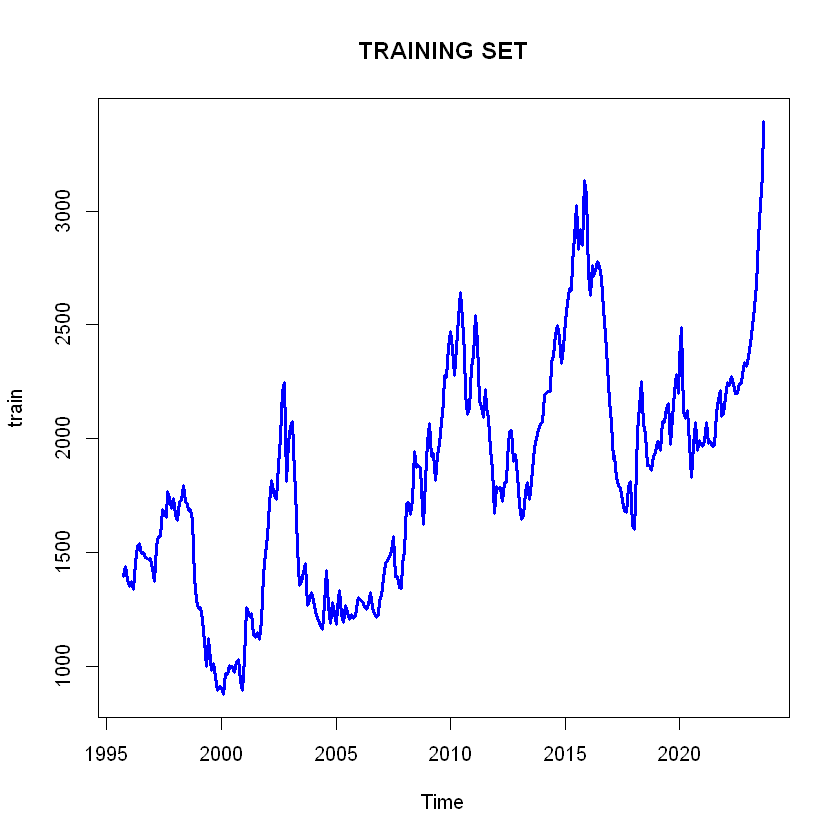

In [711]:
# Split the time series data into training sets
train <- window(cocoa_price_ts, start = c(1995, 10), end = c(2023, 9))
train
plot(train, col = "blue", lwd = 3, main = "TRAINING SET")

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,,,,,,,,,,3495.03,3799.15,3897.04
2024,4087.54,5226.12,6510.16,,,,,,,,,


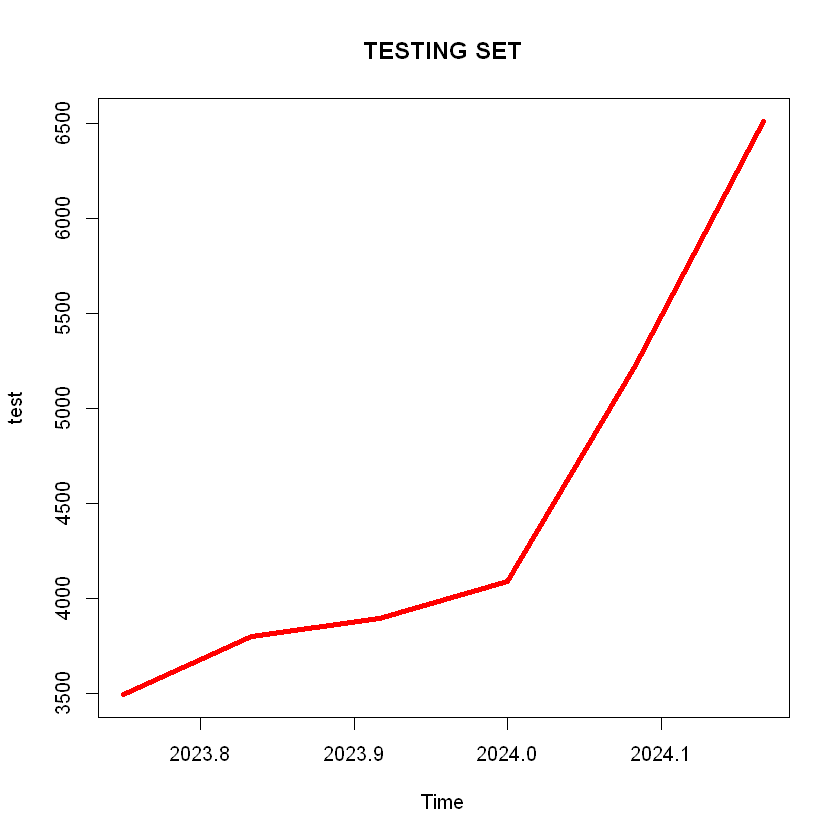

In [712]:
# Split the time series data into test sets
test <- window(cocoa_price_ts, start = c(2023, 10)) # end = c(2024, 3))
test
plot(test, col = "red", lwd = 4, main = "TESTING SET")

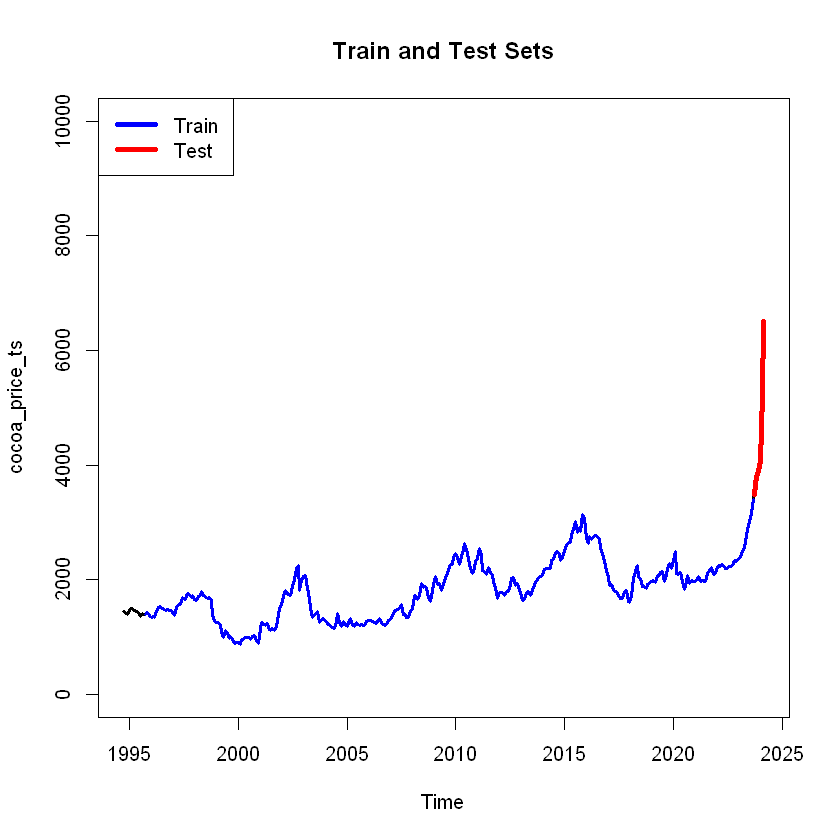

In [713]:
# Plot the entire time series with the train and test sets highlighted
plot(cocoa_price_ts, ylim = c(0, 10000), type = 'l', lwd = 3, main = 'Train and Test Sets')
lines(train, col = 'blue', lwd = 3)
lines(test, col = 'red', lwd = 4)
legend("topleft", legend = c("Train", "Test"), col = c("blue", "red"), lwd = 4)

# **SIMPLE TIME SERIES MODELS**

## **Forecast Using the Mean Model**

In this model, the forecast of the future values equals the average of previous average cocoa price 

In [714]:
# Calculate the mean of the training data
mean_price <- mean(train)
mean_price

[1] 1820.454

In [715]:
# Create a vector of forecasted prices using the mean value
forecast_mean <- meanf(train, length(test))
forecast_mean

         Point Forecast    Lo 80    Hi 80    Lo 95  Hi 95
Oct 2023       1820.454 1169.006 2471.903 822.5087 2818.4
Nov 2023       1820.454 1169.006 2471.903 822.5087 2818.4
Dec 2023       1820.454 1169.006 2471.903 822.5087 2818.4
Jan 2024       1820.454 1169.006 2471.903 822.5087 2818.4
Feb 2024       1820.454 1169.006 2471.903 822.5087 2818.4
Mar 2024       1820.454 1169.006 2471.903 822.5087 2818.4

In [716]:
round(accuracy(forecast_mean, test),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.00,505.82,413.90,-8.60,25.61,1.36,0.96,NA
Test set,2682.05,2879.91,2682.05,57.66,57.66,8.80,0.38,4.07


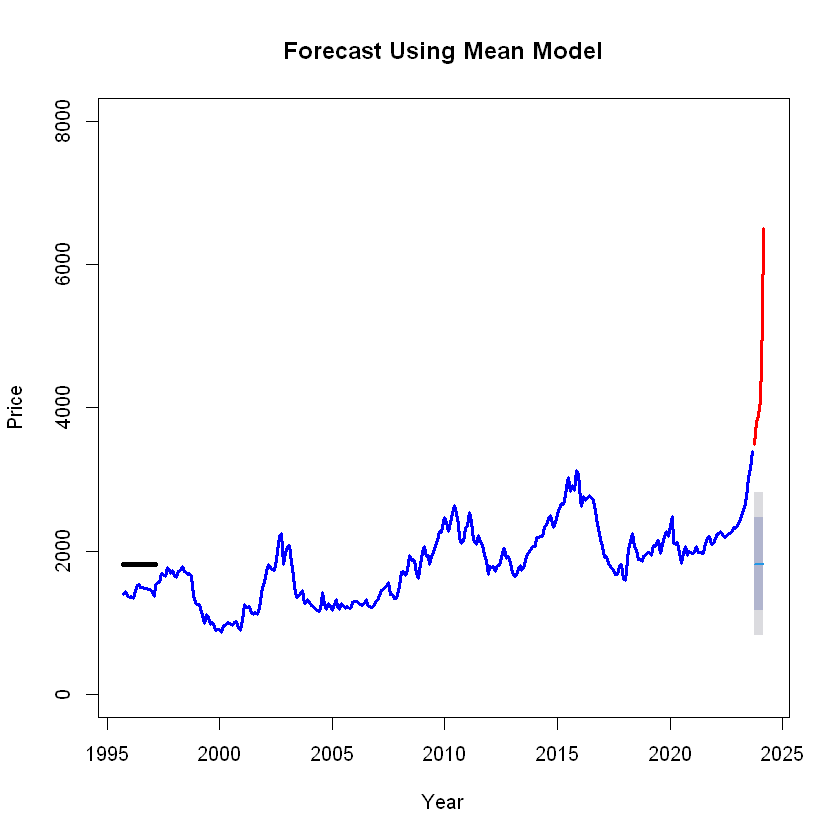

In [717]:
plot(forecast_mean, col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using Mean Model', xlab = 'Year', ylab = 'Price')
x <- c(time(train)[1], time(train)[18])
y <- c(mean(train), mean(train))
lines(x, y, col='black', lwd=4)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=3)

## **Forecast Using Naive Model**

For naive forecast model , it simply forecasts the next value to be the same as the last observed value. 

In [718]:
train[length(train)]

[1] 3395.58

In [719]:
# Generate forecasts using the naive model
forecast.naive <- rwf(train, h=length(test))
forecast.naive

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023        3395.58 3266.944 3524.216 3198.848 3592.312
Nov 2023        3395.58 3213.661 3577.499 3117.359 3673.801
Dec 2023        3395.58 3172.776 3618.384 3054.831 3736.329
Jan 2024        3395.58 3138.308 3652.852 3002.117 3789.043
Feb 2024        3395.58 3107.941 3683.219 2955.675 3835.485
Mar 2024        3395.58 3080.488 3710.672 2913.688 3877.472

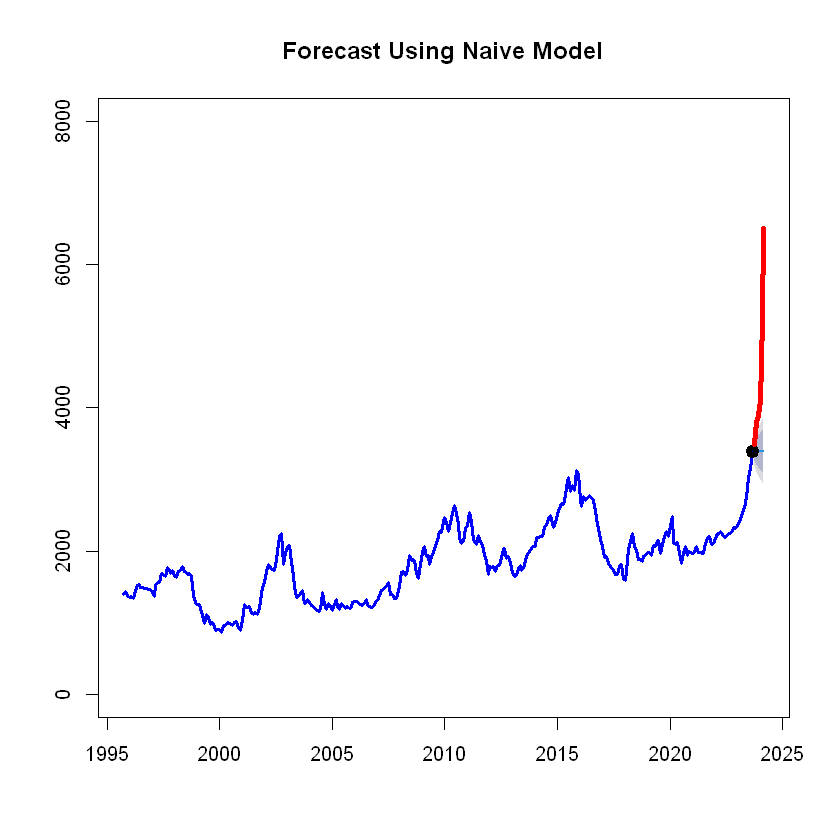

In [720]:
plot(forecast.naive,col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using Naive Model')
x <- time(train)[length(train)]
y <- train[length(train)]
points(x, y, col='black', lwd=5)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=4)

In [721]:
round(accuracy(forecast.naive, test), 2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.97,100.38,75.43,0.11,4.19,0.25,0.17,NA
Test set,1106.93,1525.04,1106.93,21.02,21.02,3.63,0.38,2.04


## **Forecast Using Seasonal Naive Model**

For naive forecasts, we simply use the last observed value from the same season as the forecast for all future time periods

In [722]:
train

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,,,,,,,,,,1394.50,1436.50,1378.84
1996,1349.50,1369.81,1338.62,1456.24,1524.09,1537.60,1495.70,1499.86,1476.14,1477.04,1469.33,1474.30
1997,1428.45,1372.70,1523.60,1571.05,1568.29,1688.38,1677.30,1652.14,1769.64,1741.43,1694.80,1737.29
1998,1668.10,1640.85,1719.18,1726.38,1794.35,1721.86,1712.17,1683.62,1687.32,1646.41,1388.52,1288.09
1999,1254.90,1257.40,1206.52,1108.00,998.75,1119.73,1074.77,980.86,1009.86,954.57,893.64,909.14
2000,906.38,874.14,966.70,962.95,1003.68,991.00,996.62,970.35,1013.57,1027.73,936.09,893.75
2001,1031.86,1257.00,1236.73,1212.60,1233.23,1140.10,1123.82,1147.17,1118.85,1197.35,1397.77,1497.00
2002,1567.59,1713.35,1815.35,1770.91,1749.78,1734.60,1881.78,2004.27,2206.19,2246.57,1811.29,1985.00
2003,2055.27,2076.40,1847.48,1774.86,1515.81,1352.76,1372.35,1410.62,1450.73,1265.57,1289.90,1324.14
2004,1286.43,1240.85,1226.57,1199.19,1178.15,1159.27,1271.91,1418.73,1261.05,1187.76,1278.18,1230.00


In [723]:
forecast.snaive <- snaive(train,h= 6)
forecast.snaive

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023        2281.01 1774.846 2787.174 1506.899 3055.121
Nov 2023        2333.84 1827.676 2840.004 1559.729 3107.951
Dec 2023        2319.35 1813.186 2825.514 1545.239 3093.461
Jan 2024        2357.59 1851.426 2863.754 1583.479 3131.701
Feb 2024        2418.26 1912.096 2924.424 1644.149 3192.371
Mar 2024        2491.37 1985.206 2997.534 1717.259 3265.481

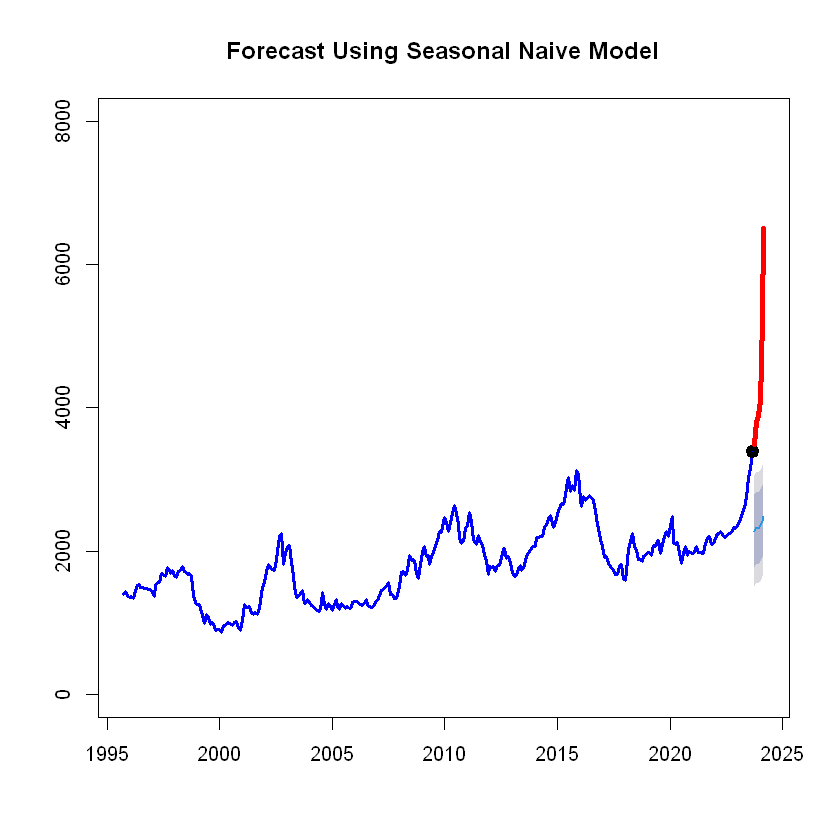

In [724]:
plot(forecast.snaive,col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using Seasonal Naive Model')
x <- time(train)[length(train)]
y <- train[length(train)]
points(x, y, col='black', lwd=5)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=4)


In [725]:
round(accuracy(forecast.snaive, test),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,45.23,394.96,304.82,-0.21,17.28,1.00,0.92,NA
Test set,2135.60,2350.09,2135.60,45.26,45.26,7.01,0.38,3.29


## **Forecast Using Drift Method**

Forecast Using Drift Method, allowing the forecasts to increase or decrease over time

In [726]:
# Generate forecasts using the drift method
forecast.drift <- rwf(train, h=length(test), drift=TRUE)
forecast.drift

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3401.553 3272.762 3530.345 3204.583 3598.523
Nov 2023       3407.527 3225.117 3589.937 3128.555 3686.499
Dec 2023       3413.500 3189.763 3637.237 3071.324 3755.676
Jan 2024       3419.473 3160.743 3678.204 3023.779 3815.168
Feb 2024       3425.447 3135.751 3715.143 2982.395 3868.499
Mar 2024       3431.420 3113.607 3749.233 2945.367 3917.473

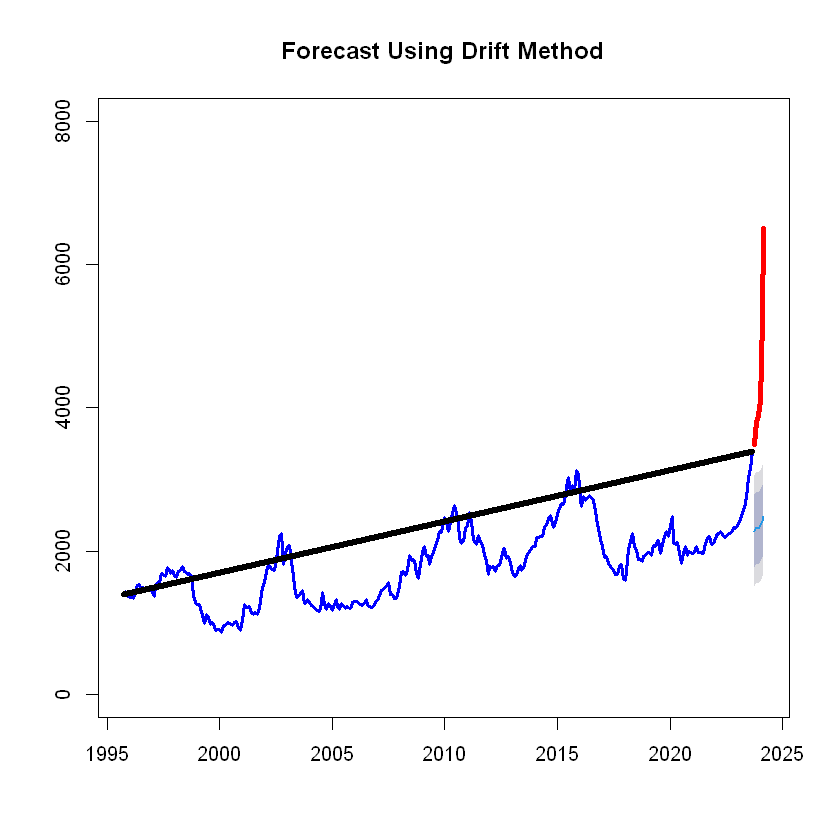

In [727]:
plot(forecast.snaive,col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using Drift Method')
x <- c(time(train)[1], time(train)[length(train)])
y <- c(train[1], train[length(train)])
lines(x, y, col='black', lwd=5)
x <- as.vector(time(test))
y <- test 
lines(x, y, col='red', lwd=4)

In [728]:
round(accuracy(forecast.drift, test),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.00,100.20,75.15,-0.24,4.20,0.25,0.17,NA
Test set,1086.02,1503.51,1086.02,20.58,20.58,3.56,0.38,2.01


## **EVALUATION OF SIMPLE TIME SERIES MODELS**

In [729]:
# Mean forecast
accuracy_mean <- accuracy(forecast_mean, test)
# Naive forecast
accuracy_naive <- accuracy(forecast.naive, test)
# Seasonal naive forecast
accuracy_snaive <- accuracy(forecast.snaive, test)
# Drift forecast
accuracy_drift <- accuracy(forecast.drift, test)

In [730]:
# Round accuracy measures to two decimal places
accuracy_mean <- round(accuracy_mean, 2)
accuracy_naive <- round(accuracy_naive, 2)
accuracy_snaive <- round(accuracy_snaive, 2)
accuracy_drift <- round(accuracy_drift, 2)

In [731]:
# Create a data frame to display the evaluation results
evaluation_results_simple <- data.frame(
  Model = c("Mean", "Naive", "Seasonal Naive", "Drift"),
  MAPE = c(accuracy_mean[2,5], accuracy_naive[2,5], accuracy_snaive[2,5], accuracy_drift[2,5]),
  MAE = c(accuracy_mean[2,3], accuracy_naive[2,3], accuracy_snaive[2,3], accuracy_drift[2,3]),
  RMSE = c(accuracy_mean[2,2], accuracy_naive[2,2], accuracy_snaive[2,2], accuracy_drift[2,2])
)
# Round the numeric columns to two decimal places
evaluation_results_simple[, -1] <- round(evaluation_results_simple[, -1], 2)

In [732]:
print(evaluation_results_simple)

           Model  MAPE     MAE    RMSE
1           Mean 57.66 2682.05 2879.91
2          Naive 21.02 1106.93 1525.04
3 Seasonal Naive 45.26 2135.60 2350.09
4          Drift 20.58 1086.02 1503.51


In [733]:
evaluation_results_simple

Model,MAPE,MAE,RMSE
<chr>,<dbl>,<dbl>,<dbl>
Mean,57.66,2682.05,2879.91
Naive,21.02,1106.93,1525.04
Seasonal Naive,45.26,2135.60,2350.09
Drift,20.58,1086.02,1503.51


**VISUALIZE TO VIEW THE DISTRIBUTION**

In [734]:
# Create a data frame with the evaluation results for simple time series models
evaluation_results_simple_ts <- data.frame(
  Model = c("Mean", "Naive", "Seasonal Naive", "Drift"),
  MAPE = c(413.90, 75.43, 304.82, 75.15),
  MAE = c(2682.05, 1106.93, 2135.60, 1086.02),
  RMSE = c(505.82, 100.38, 394.96, 100.20)
)

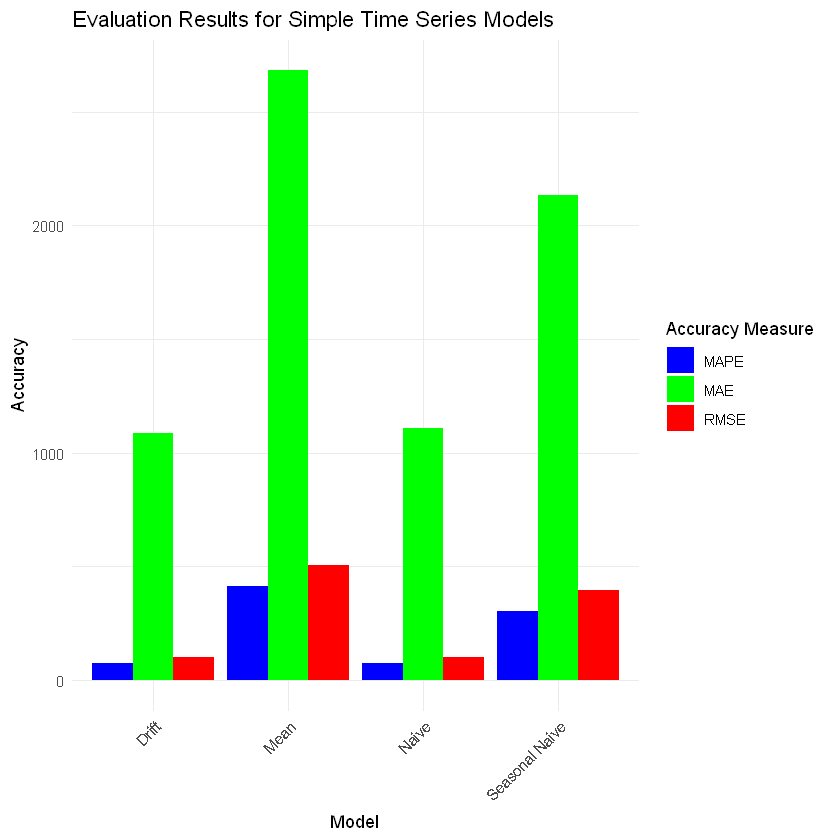

In [735]:
# Melt the data frame for easier plotting
evaluation_results_simple_ts_melted <- reshape2::melt(evaluation_results_simple_ts, id.vars = "Model")

# Plot MAPE, MAE, and RMSE in a single plot
ggplot(evaluation_results_simple_ts_melted, aes(x = Model, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Evaluation Results for Simple Time Series Models",
       y = "Accuracy",
       x = "Model",
       fill = "Accuracy Measure") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("MAPE" = "blue", "MAE" = "green", "RMSE" = "red"))


# **EXPONENTIAL SMOOTHING MODELS** 

## **Simple Exponential Smoothing model**

Exponential smoothing models are a class of forecasting methods that assign exponentially decreasing weights to past observations.

In [736]:
# Generate forecasts using the fitted SES model
simplex_ses <-  ses(train, h=length(test))
simplex_ses

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3395.556 3266.726 3524.387 3198.527 3592.585
Nov 2023       3395.556 3213.371 3577.741 3116.929 3674.184
Dec 2023       3395.556 3172.430 3618.682 3054.314 3736.798
Jan 2024       3395.556 3137.914 3653.198 3001.527 3789.585
Feb 2024       3395.556 3107.505 3683.607 2955.020 3836.092
Mar 2024       3395.556 3080.013 3711.099 2912.975 3878.137

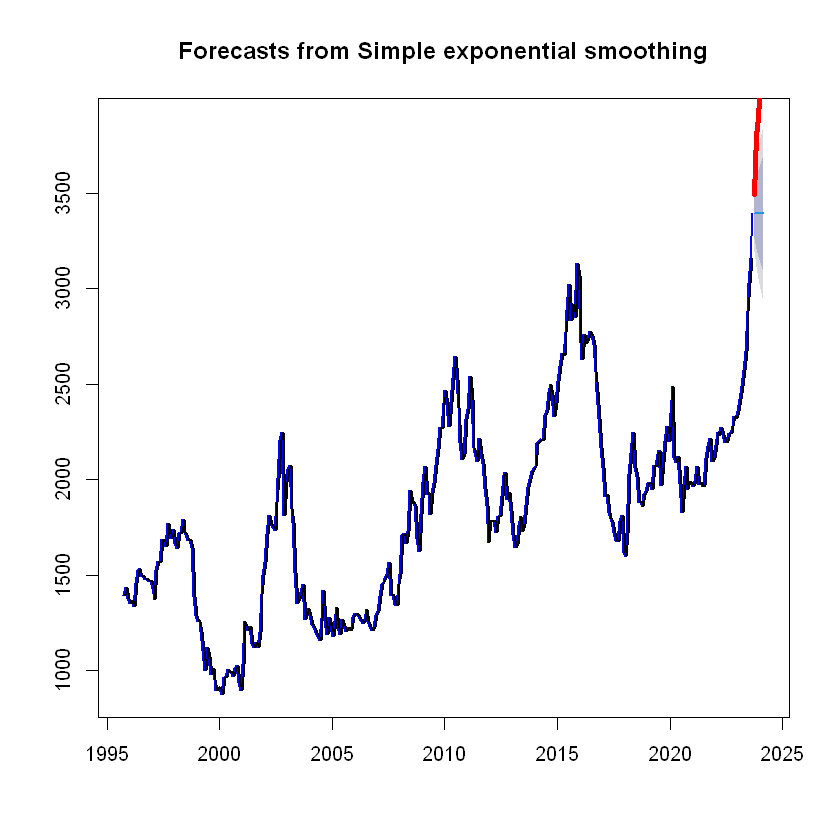

In [737]:
plot(simplex_ses, lw=2, col='blue')
x <- as.vector(time(train))
y <- simplex_ses$fitted
lines(x, y, col='black', lw=2)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=4)

In [738]:
round(accuracy(simplex_ses, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.954,100.227,75.206,0.113,4.179,0.247,0.170,NA
Test set,1106.951,1525.059,1106.951,21.023,21.023,3.632,0.384,2.039


In [739]:
simplex_ses$model

Simple exponential smoothing 

Call:
 ses(y = train, h = length(test)) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 1395.2838 

  sigma:  100.527

     AIC     AICc      BIC 
5056.750 5056.822 5068.201 

In [740]:
simplex_ses_0.05 <- ses(train, h=length(test), alpha=0.05)
simplex_ses_0.05

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       2400.231 2000.488 2799.975 1788.877 3011.586
Nov 2023       2400.231 1999.989 2800.474 1788.113 3012.350
Dec 2023       2400.231 1999.490 2800.973 1787.350 3013.112
Jan 2024       2400.231 1998.992 2801.471 1786.589 3013.874
Feb 2024       2400.231 1998.494 2801.968 1785.828 3014.635
Mar 2024       2400.231 1997.997 2802.465 1785.068 3015.395

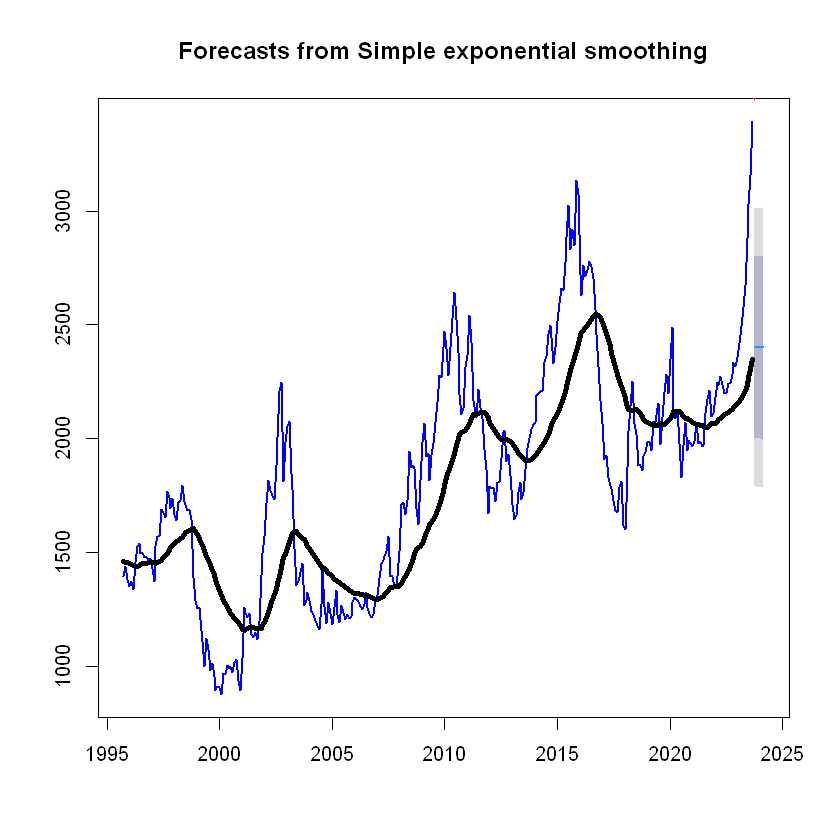

In [741]:
plot(simplex_ses_0.05, lw=2, col='blue')
x <- as.vector(time(train))
y <- simplex_ses_0.05$fitted
lines(x, y, col='black', lw=4)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=3)

In [742]:
round(accuracy(simplex_ses_0.05, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,56.069,310.992,243.473,0.068,13.693,0.799,0.930,NA
Test set,2102.275,2349.474,2102.275,44.173,44.173,6.897,0.384,3.281


In [743]:
simplex_ses_0.7 <- ses(train, h=length(test), alpha=0.7)
simplex_ses_0.7 

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3306.448 3165.386 3447.510 3090.712 3522.184
Nov 2023       3306.448 3134.260 3478.637 3043.109 3569.788
Dec 2023       3306.448 3107.956 3504.940 3002.881 3610.016
Jan 2024       3306.448 3084.752 3528.145 2967.393 3645.504
Feb 2024       3306.448 3063.756 3549.141 2935.282 3677.614
Mar 2024       3306.448 3044.437 3568.460 2905.737 3707.160

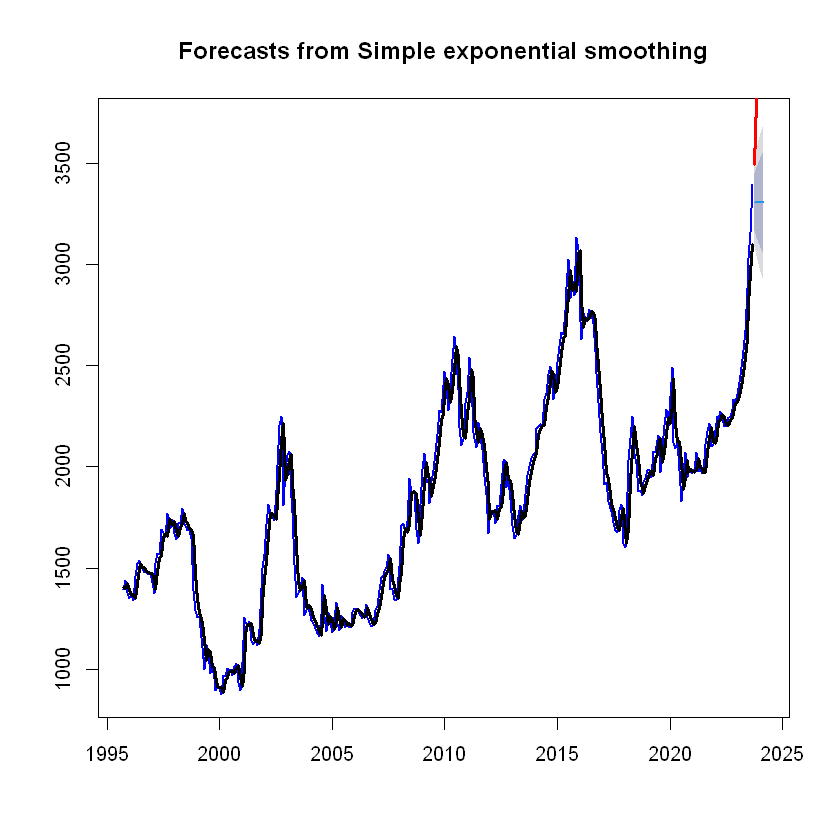

In [744]:
plot(simplex_ses_0.7, lw=2, col='blue')
x <- as.vector(time(train))
y <- simplex_ses_0.7$fitted
lines(x, y, col='black', lw=3)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=3)

In [745]:
round(accuracy(simplex_ses_0.7, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,8.100,109.743,83.821,0.131,4.636,0.275,0.421,NA
Test set,1196.058,1590.918,1196.058,23.095,23.095,3.924,0.384,2.14


## **Using ets(‘ANN’)**

In [746]:
forecast_ann <- ets(train, model='ANN')

In [747]:
# Fit the ETS model with ANN (additive error, no trend, additive seasonality)
forecast_ann2 <- forecast::forecast(ets(train, model = 'ANN'), h = length(test))
(forecast_ann2)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3395.556 3266.726 3524.387 3198.527 3592.585
Nov 2023       3395.556 3213.371 3577.741 3116.929 3674.184
Dec 2023       3395.556 3172.430 3618.682 3054.314 3736.798
Jan 2024       3395.556 3137.914 3653.198 3001.527 3789.585
Feb 2024       3395.556 3107.505 3683.607 2955.020 3836.092
Mar 2024       3395.556 3080.013 3711.099 2912.975 3878.137

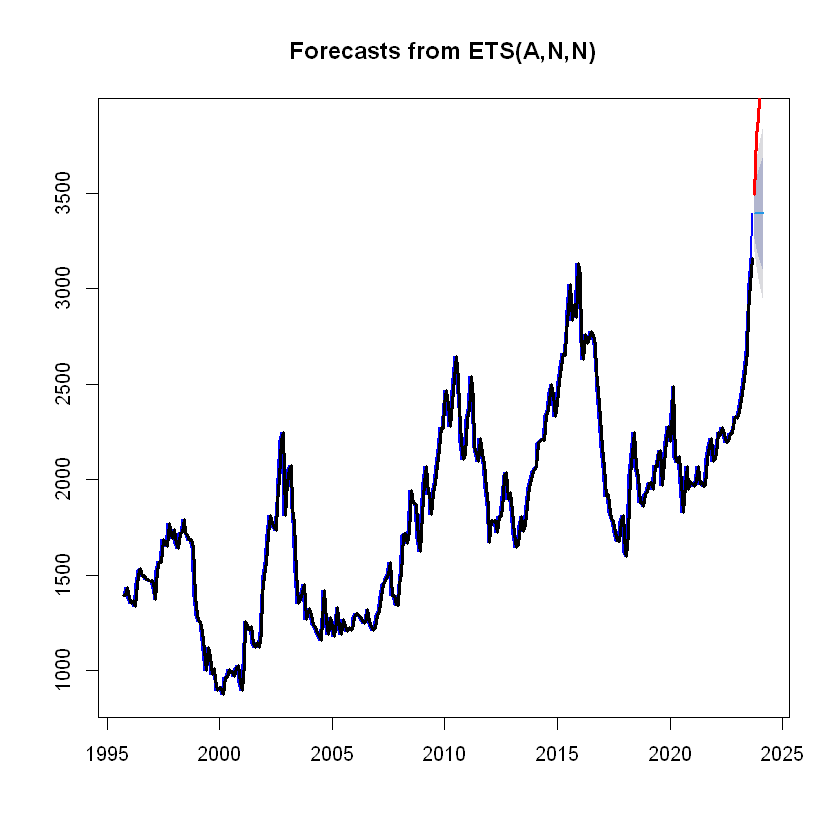

In [748]:
plot(forecast_ann2, lw=2, col='blue')
x <- as.vector(time(train))
y <- forecast_ann2$fitted
lines(x, y, col='black', lw=3)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=3)

In [749]:
round(accuracy(forecast_ann2, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.954,100.227,75.206,0.113,4.179,0.247,0.170,NA
Test set,1106.951,1525.059,1106.951,21.023,21.023,3.632,0.384,2.039


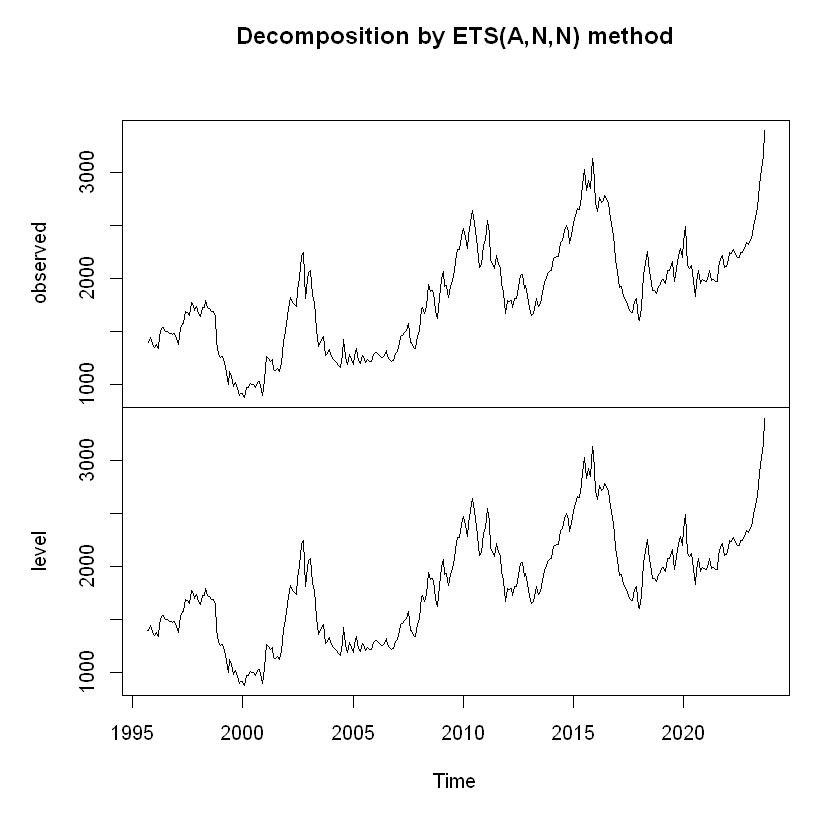

In [750]:
plot(forecast_ann)

In [751]:
forecast_ann2

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3395.556 3266.726 3524.387 3198.527 3592.585
Nov 2023       3395.556 3213.371 3577.741 3116.929 3674.184
Dec 2023       3395.556 3172.430 3618.682 3054.314 3736.798
Jan 2024       3395.556 3137.914 3653.198 3001.527 3789.585
Feb 2024       3395.556 3107.505 3683.607 2955.020 3836.092
Mar 2024       3395.556 3080.013 3711.099 2912.975 3878.137

In [752]:
forecast_ann

ETS(A,N,N) 

Call:
 ets(y = train, model = "ANN") 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 1395.2838 

  sigma:  100.527

     AIC     AICc      BIC 
5056.750 5056.822 5068.201 

In [753]:
round(accuracy(forecast_ann2, test),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.95,100.23,75.21,0.11,4.18,0.25,0.17,NA
Test set,1106.95,1525.06,1106.95,21.02,21.02,3.63,0.38,2.04


In [754]:
round(accuracy(simplex_ses, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.954,100.227,75.206,0.113,4.179,0.247,0.170,NA
Test set,1106.951,1525.059,1106.951,21.023,21.023,3.632,0.384,2.039


In [755]:
round(accuracy(forecast_ann2, test),8)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.953787,100.2274,75.20632,0.1129027,4.179265,0.2467257,0.1695202,NA
Test set,1106.950545,1525.0591,1106.95054,21.0227100,21.022710,3.6315186,0.3844148,2.039491


In [756]:
round(accuracy(simplex_ses, test),8)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.953787,100.2274,75.20632,0.1129027,4.179265,0.2467257,0.1695202,NA
Test set,1106.950545,1525.0591,1106.95054,21.0227100,21.022710,3.6315186,0.3844148,2.039491


## **Using holt()**

In [757]:
forecast.holt <- holt(train, h=length(test))
forecast.holt

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3401.576 3272.541 3530.612 3204.233 3598.919
Nov 2023       3407.815 3225.417 3590.213 3128.861 3686.769
Dec 2023       3414.053 3190.690 3637.417 3072.449 3755.658
Jan 2024       3420.292 3162.384 3678.200 3025.855 3814.729
Feb 2024       3426.531 3138.181 3714.880 2985.538 3867.523
Mar 2024       3432.769 3116.893 3748.645 2949.679 3915.860

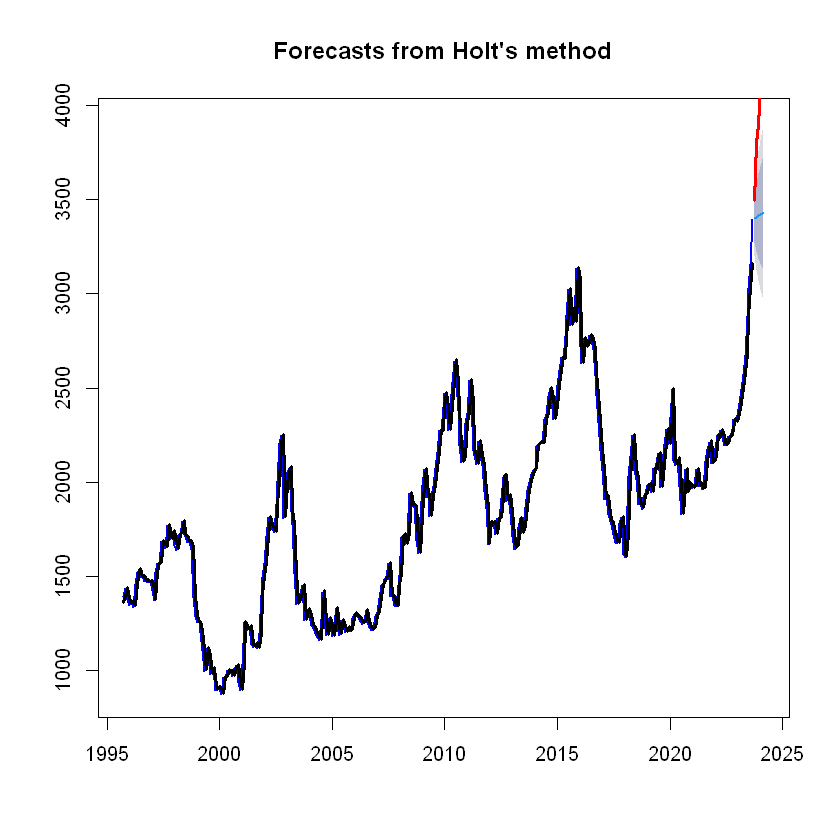

In [758]:
plot(forecast.holt, lw=2, col='blue')
x <- as.vector(time(train))
y <- forecast.holt$model$fitted
lines(x, y, col='black', lw=3)
x <- as.vector(time(train))
y <- forecast.holt$model$fitted
lines(x, y, col='black', lw=2)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=3)

In [759]:
round(accuracy(forecast.holt, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.117,100.086,75.045,-0.248,4.192,0.246,0.171,NA
Test set,1085.334,1502.732,1085.334,20.566,20.566,3.561,0.383,2.007


## **Using ets with model='AAN'**

In [760]:
# Fit the ETS model with the ANN specification
forecast_ets<- ets(train, model = 'ANN')

In [761]:
# Generate forecasts using the fitted ETS model
forecast_ets3 <- forecast.ets(forecast_ets, h = length(test))
forecast_ets3

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3395.556 3266.726 3524.387 3198.527 3592.585
Nov 2023       3395.556 3213.371 3577.741 3116.929 3674.184
Dec 2023       3395.556 3172.430 3618.682 3054.314 3736.798
Jan 2024       3395.556 3137.914 3653.198 3001.527 3789.585
Feb 2024       3395.556 3107.505 3683.607 2955.020 3836.092
Mar 2024       3395.556 3080.013 3711.099 2912.975 3878.137

In [762]:
names(forecast_ets)

[1] "loglik"     "aic"        "bic"        "aicc"       "mse"       
 [6] "amse"       "fit"        "residuals"  "fitted"     "states"    
[11] "par"        "m"          "method"     "series"     "components"
[16] "call"       "initstate"  "sigma2"     "x"

[1] 15

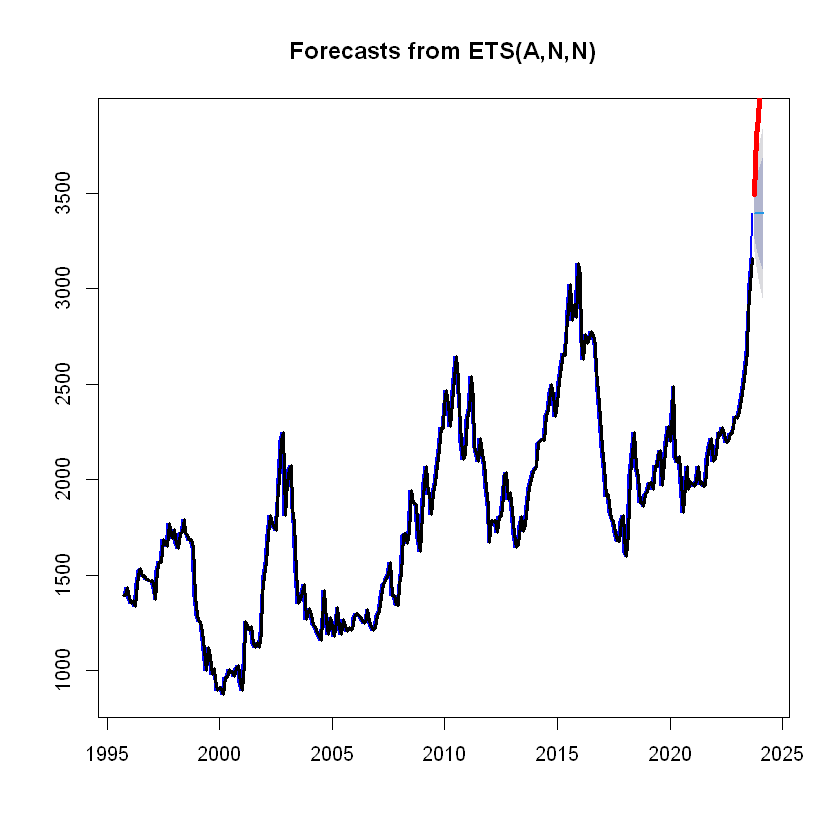

In [763]:
plot(forecast_ets3, lw=2, col='blue')
x <- as.vector(time(train))
y <- forecast_ets$fitted
lines(x, y, col='black', lw=3)
x <- as.vector(time(train))
15
y <- forecast_ets$fitted
lines(x, y, col='black', lw=2)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=4)

In [764]:
forecast_ets

ETS(A,N,N) 

Call:
 ets(y = train, model = "ANN") 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 1395.2838 

  sigma:  100.527

     AIC     AICc      BIC 
5056.750 5056.822 5068.201 

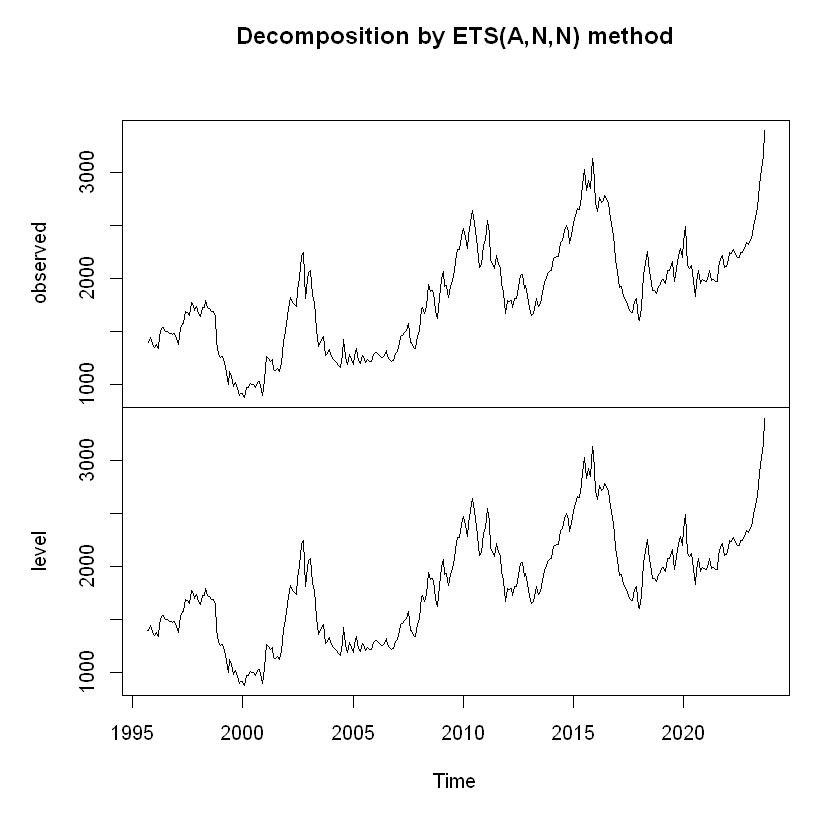

In [765]:
plot(forecast_ets)

In [766]:
round(accuracy(forecast_ets3, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.954,100.227,75.206,0.113,4.179,0.247,0.170,NA
Test set,1106.951,1525.059,1106.951,21.023,21.023,3.632,0.384,2.039


In [767]:
round(accuracy(forecast.holt, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.117,100.086,75.045,-0.248,4.192,0.246,0.171,NA
Test set,1085.334,1502.732,1085.334,20.566,20.566,3.561,0.383,2.007


## **USING  ETS AAA**

In [768]:
# Generate the ETS model with 'AAA' specification
forecast_ets_aaa <- ets(train, model = 'AAA') 

In [769]:
# Generate forecasts using the fitted ETS model
forecast_ets_aaa4 <- forecast.ets(forecast_ets_aaa, h = 6)

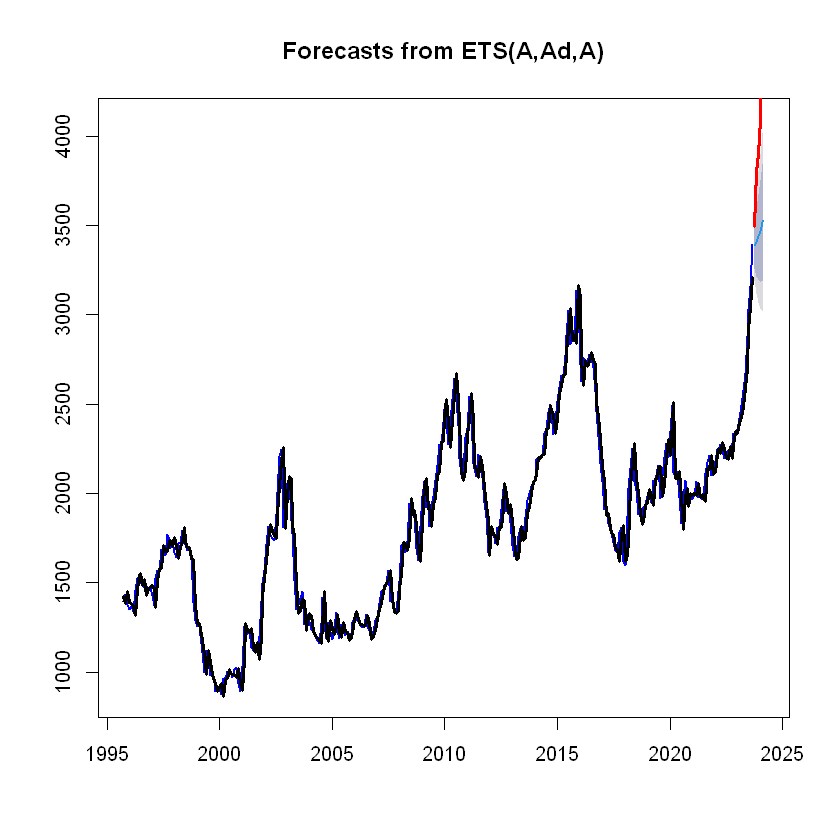

In [770]:
plot(forecast_ets_aaa4, lw=2, col='blue')
x <- as.vector(time(train))
y <- forecast_ets_aaa$fitted
lines(x, y, col='black', lw=3)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=3)

In [771]:
forecast_ets_aaa 

ETS(A,Ad,A) 

Call:
 ets(y = train, model = "AAA") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0904 
    gamma = 1e-04 
    phi   = 0.8028 

  Initial states:
    l = 1437.1636 
    b = 11.0796 
    s = 26.9133 8.7233 18.4016 10.3139 3.7581 0.7264
           15.2923 15.6134 -19.2511 -27.8592 -32.9162 -19.7157

  sigma:  100.7413

     AIC     AICc      BIC 
5072.741 5074.899 5141.449 

In [772]:
forecast_ets_aaa4

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3388.365 3259.260 3517.470 3190.916 3585.814
Nov 2023       3406.732 3217.414 3596.050 3117.195 3696.268
Dec 2023       3437.180 3198.109 3676.252 3071.552 3802.808
Jan 2024       3466.171 3182.852 3749.490 3032.872 3899.470
Feb 2024       3517.398 3193.542 3841.254 3022.103 4012.693
Mar 2024       3530.212 3168.642 3891.781 2977.238 4083.185

In [773]:
accuracy(forecast_ets_aaa4, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,4.538038,98.15966,73.02333,0.09611116,4.081885,0.2395641,0.1009178,NA
Test set,1044.830385,1446.99479,1044.83039,19.80873278,19.808733,3.4277241,0.3733740,1.928451


In [774]:
round(accuracy(forecast_ets_aaa4, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,4.538,98.160,73.023,0.096,4.082,0.240,0.101,NA
Test set,1044.830,1446.995,1044.830,19.809,19.809,3.428,0.373,1.928


## **Using ETS MMM**

In [775]:
# Generate the ETS model with 'MMM'
forcast_ets.mmm <- ets(train, model = 'MMM')

In [776]:
# Generate forecasts using the fitted ETS-MMM model
forcast_ets.mmm5 <- forecast.ets(forcast_ets.mmm, h = 6)

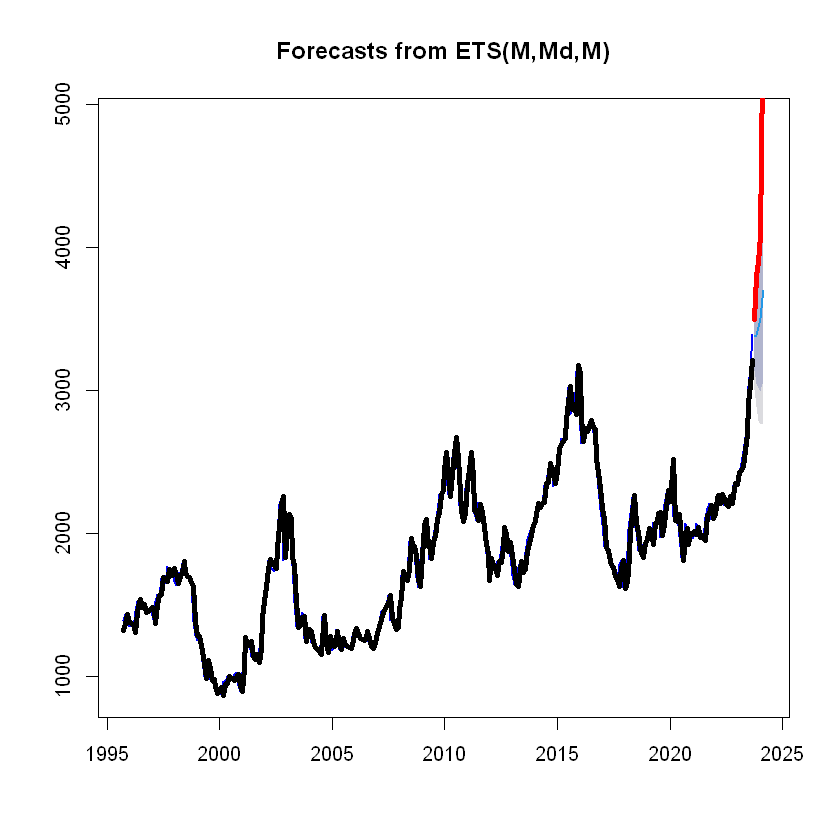

In [777]:
plot(forcast_ets.mmm5, lw=2, col='blue')
x <- as.vector(time(train))
y <- forcast_ets.mmm$fitted
lines(x, y, col='black', lw=4)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=4)


In [778]:
forcast_ets.mmm

ETS(M,Md,M) 

Call:
 ets(y = train, model = "MMM") 

  Smoothing parameters:
    alpha = 0.9998 
    beta  = 0.0385 
    gamma = 1e-04 
    phi   = 0.9623 

  Initial states:
    l = 1351.5297 
    b = 0.9884 
    s = 1.006 0.9999 1.0068 1.0057 1.0036 1.0065
           1.0201 1.0151 0.9886 0.9809 0.978 0.9887

  sigma:  0.0556

     AIC     AICc      BIC 
5047.939 5050.096 5116.647 

In [779]:
forcast_ets.mmm5

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3379.947 3139.392 3615.862 3010.215 3730.541
Nov 2023       3386.300 3048.881 3738.418 2886.617 3919.268
Dec 2023       3438.276 3020.773 3870.483 2791.256 4112.799
Jan 2024       3506.336 2994.836 4028.598 2760.590 4340.788
Feb 2024       3641.269 3048.569 4267.866 2773.512 4635.226
Mar 2024       3699.556 3023.032 4414.434 2746.842 4882.720

In [780]:
accuracy(forcast_ets.mmm5, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.415658,99.33988,73.28198,0.0145616,4.095683,0.2404126,0.1525435,NA
Test set,993.892661,1362.79115,993.89266,18.9414761,18.941476,3.2606152,0.3589004,1.816627


In [781]:
round(accuracy(forcast_ets.mmm5, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.416,99.340,73.282,0.015,4.096,0.240,0.153,NA
Test set,993.893,1362.791,993.893,18.941,18.941,3.261,0.359,1.817


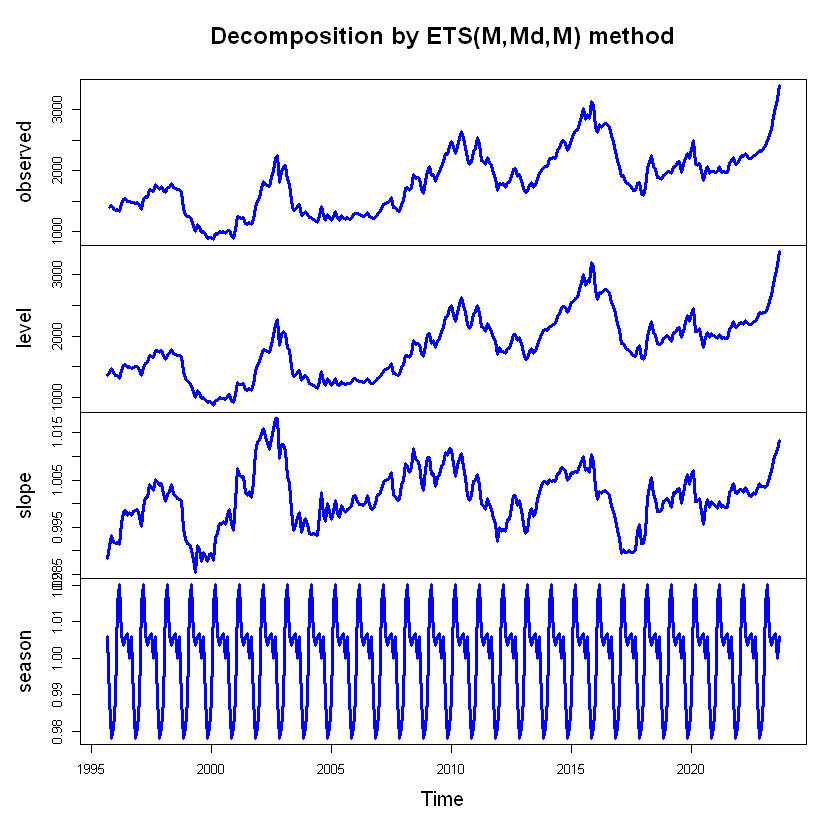

In [782]:
# Plot with customized color and line width
plot(forcast_ets.mmm, col = "blue", lwd = 3)

## **EVALUATION OF EXPONENTIAL SMOOTHING MODELS**

In [783]:
# SES model
accuracy_ses <- accuracy(simplex_ses, test)
accuracy_ses_0.05 <- accuracy(simplex_ses_0.05, test)
accuracy_ses_0.7 <- accuracy(simplex_ses_0.7, test)
# ETS with 'ANN' model
accuracy_ann <- accuracy(forecast_ann2, test)
# Holt's method
accuracy_holt <- accuracy(forecast.holt, test)
# ETS with 'AAN' model
accuracy_ets_aan <- accuracy(forecast_ets3, test)
# ETS with 'AAA' model
accuracy_ets_aaa <- accuracy(forecast_ets_aaa4, test)
# ETS with 'MMM' model
accuracy_ets_mmm <- accuracy(forcast_ets.mmm5, test)

In [784]:
# Round accuracy measures to three decimal places
accuracy_ses <- round(accuracy(simplex_ses, test), 3)
accuracy_ses_0.05 <- round(accuracy(simplex_ses_0.05, test), 3)
accuracy_ses_0.7 <- round(accuracy(simplex_ses_0.7, test), 3)
accuracy_ann <- round(accuracy(forecast_ann2, test), 3)
accuracy_holt <- round(accuracy(forecast.holt, test), 3)
accuracy_ets_aan <- round(accuracy(forecast_ets3, test), 3)
accuracy_ets_aaa <- round(accuracy(forecast_ets_aaa4, test), 3)
accuracy_ets_mmm <- round(accuracy(forcast_ets.mmm5, test), 3)

In [785]:
# Create a data frame to display the evaluation results
evaluation_results_exp_smoothing <- data.frame(
  Model = c("Simple Exponential Smoothing", "Simple Exponential Smoothing (Alpha = 0.05)", "Simple Exponential Smoothing (Alpha = 0.7)", 
            "ETS (ANN)", "Holt's Method", "ETS (AAN)", "ETS (AAA)", "ETS (MMM)"),
  MAPE = c(accuracy_ses[2,5], accuracy_ses_0.05[2,5], accuracy_ses_0.7[2,5], accuracy_ann[2,5], accuracy_holt[2,5],
           accuracy_ets_aan[2,5], accuracy_ets_aaa[2,5], accuracy_ets_mmm[2,5]),
  MAE = c(accuracy_ses[2,3], accuracy_ses_0.05[2,3], accuracy_ses_0.7[2,3], accuracy_ann[2,3], accuracy_holt[2,3],
          accuracy_ets_aan[2,3], accuracy_ets_aaa[2,3], accuracy_ets_mmm[2,3]),
  RMSE = c(accuracy_ses[2,2], accuracy_ses_0.05[2,2], accuracy_ses_0.7[2,2], accuracy_ann[2,2], accuracy_holt[2,2],
           accuracy_ets_aan[2,2], accuracy_ets_aaa[2,2], accuracy_ets_mmm[2,2])
)

In [786]:
print(evaluation_results_exp_smoothing)


                                        Model   MAPE      MAE     RMSE
1                Simple Exponential Smoothing 21.023 1106.951 1525.059
2 Simple Exponential Smoothing (Alpha = 0.05) 44.173 2102.275 2349.474
3  Simple Exponential Smoothing (Alpha = 0.7) 23.095 1196.058 1590.918
4                                   ETS (ANN) 21.023 1106.951 1525.059
5                               Holt's Method 20.566 1085.334 1502.732
6                                   ETS (AAN) 21.023 1106.951 1525.059
7                                   ETS (AAA) 19.809 1044.830 1446.995
8                                   ETS (MMM) 18.941  993.893 1362.791


In [787]:
evaluation_results_exp_smoothing

Model,MAPE,MAE,RMSE
<chr>,<dbl>,<dbl>,<dbl>
Simple Exponential Smoothing,21.023,1106.951,1525.059
Simple Exponential Smoothing (Alpha = 0.05),44.173,2102.275,2349.474
Simple Exponential Smoothing (Alpha = 0.7),23.095,1196.058,1590.918
ETS (ANN),21.023,1106.951,1525.059
Holt's Method,20.566,1085.334,1502.732
ETS (AAN),21.023,1106.951,1525.059
ETS (AAA),19.809,1044.830,1446.995
ETS (MMM),18.941,993.893,1362.791


**VISUALIZE TO VIEW THE DISTRIBUTION**

In [788]:
library(ggplot2)

# Create a data frame with the evaluation results
evaluation_results <- data.frame(
  Model = c("Simple Exponential Smoothing", "Simple Exponential Smoothing (Alpha = 0.05)", "Simple Exponential Smoothing (Alpha = 0.7)", 
            "ETS (ANN)", "Holt's Method", "ETS (AAN)", "ETS (AAA)", "ETS (MMM)"),
  MAPE = c(75.206, 243.473, 83.821, 75.206, 75.045, 75.206, 73.023, 73.282),
  MAE = c(1106.951, 2102.275, 1196.058, 1106.951, 1085.334, 1106.951, 1044.830, 993.893),
  RMSE = c(100.227, 310.992, 109.743, 100.227, 100.086, 100.227, 98.160, 99.340)
)


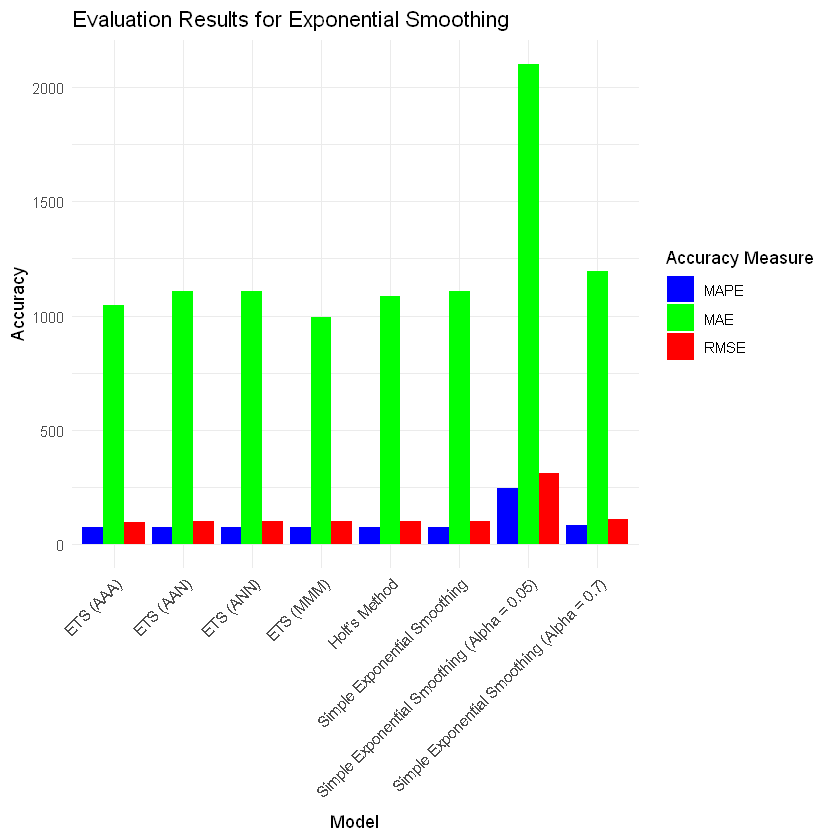

In [789]:
# Melt the data frame for easier plotting
evaluation_results_melted <- reshape2::melt(evaluation_results, id.vars = "Model")

# Plot MAPE
ggplot(evaluation_results_melted, aes(x = Model, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Evaluation Results for Exponential Smoothing",
       y = "Accuracy",
       x = "Model",ZZ
       fill = "Accuracy Measure") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("MAPE" = "blue", "MAE" = "green", "RMSE" = "red"))

# **ARIMA/SARIMA MODELS**

In [790]:
cocoa_price_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,,,,1447.95,1437.05,1399.43
1995,1468.86,1510.55,1484.91,1469.26,1445.32,1437.14,1364.10,1413.00,1396.86,1394.50,1436.50,1378.84
1996,1349.50,1369.81,1338.62,1456.24,1524.09,1537.60,1495.70,1499.86,1476.14,1477.04,1469.33,1474.30
1997,1428.45,1372.70,1523.60,1571.05,1568.29,1688.38,1677.30,1652.14,1769.64,1741.43,1694.80,1737.29
1998,1668.10,1640.85,1719.18,1726.38,1794.35,1721.86,1712.17,1683.62,1687.32,1646.41,1388.52,1288.09
1999,1254.90,1257.40,1206.52,1108.00,998.75,1119.73,1074.77,980.86,1009.86,954.57,893.64,909.14
2000,906.38,874.14,966.70,962.95,1003.68,991.00,996.62,970.35,1013.57,1027.73,936.09,893.75
2001,1031.86,1257.00,1236.73,1212.60,1233.23,1140.10,1123.82,1147.17,1118.85,1197.35,1397.77,1497.00
2002,1567.59,1713.35,1815.35,1770.91,1749.78,1734.60,1881.78,2004.27,2206.19,2246.57,1811.29,1985.00
2003,2055.27,2076.40,1847.48,1774.86,1515.81,1352.76,1372.35,1410.62,1450.73,1265.57,1289.90,1324.14


In [791]:
diff_cocoa_price_ts2 <- diff(cocoa_price_ts)

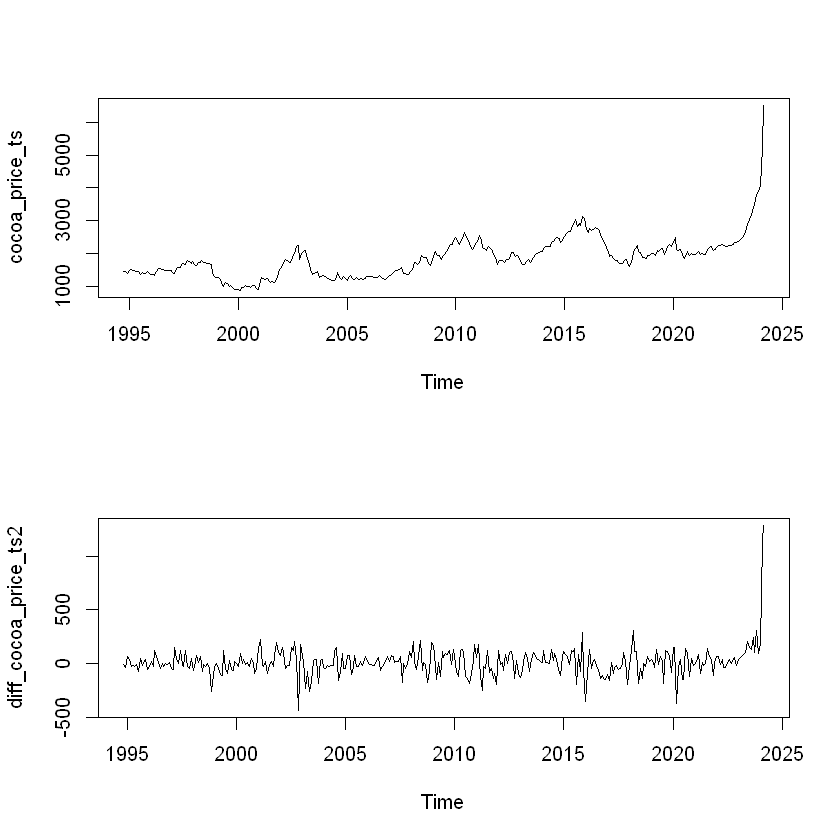

In [792]:
par(mfrow=c(2,1))
plot(cocoa_price_ts)
plot(diff_cocoa_price_ts2)

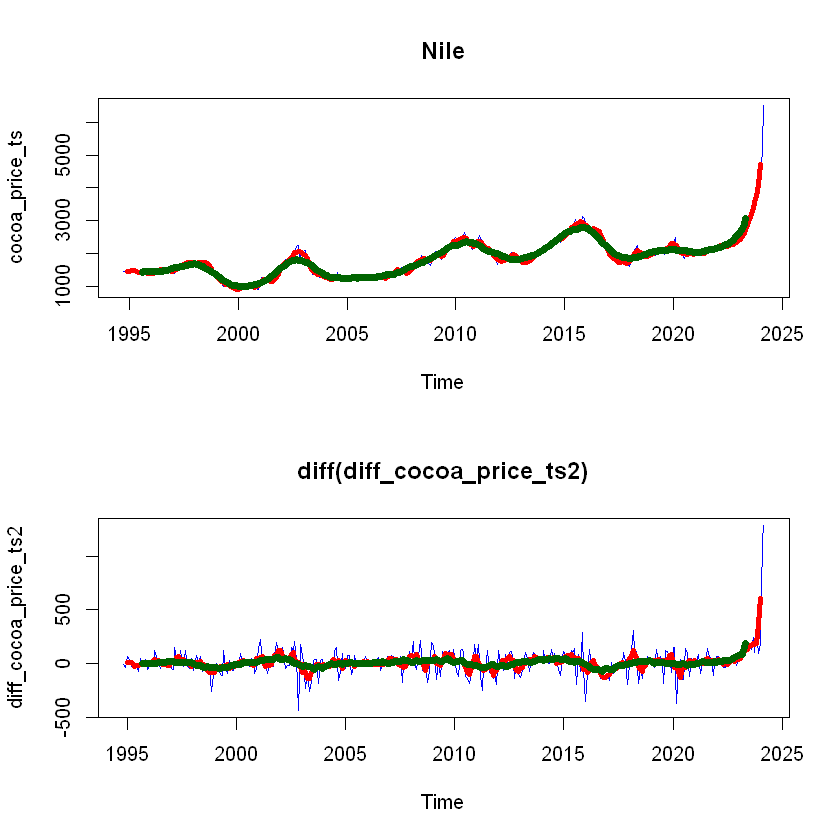

In [793]:
par(mfrow=c(2,1))

plot(cocoa_price_ts, col='blue', main='Nile')
x <- as.vector(time(cocoa_price_ts))
y <- ma(cocoa_price_ts, order=5)
lines(x, y, col='red', lw=4)
y <- ma(cocoa_price_ts, order=20)
lines(x, y, col='darkgreen', lw=6)

plot(diff_cocoa_price_ts2, col='blue', main='diff(diff_cocoa_price_ts2)')
x <- as.vector(time(diff_cocoa_price_ts2))
y <- ma(diff_cocoa_price_ts2, order=5)
lines(x, y, col='red', lw=4)
y <- ma(diff_cocoa_price_ts2, order=20)
lines(x, y, col='darkgreen', lw=6)

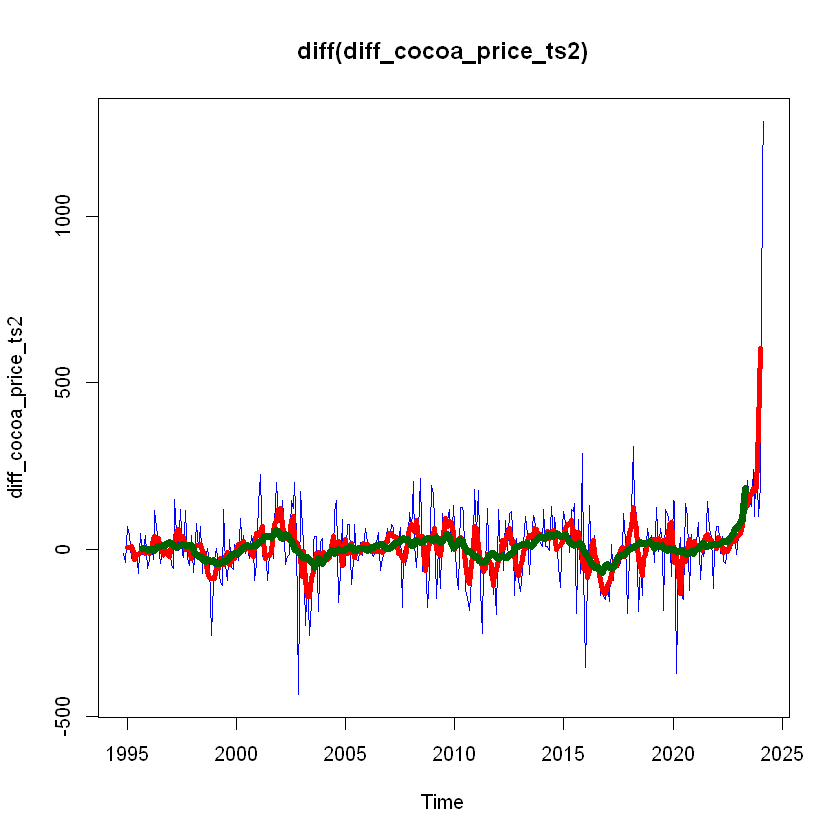

In [794]:
plot(diff_cocoa_price_ts2, col='blue', main='diff(diff_cocoa_price_ts2)')
x <- as.vector(time(diff_cocoa_price_ts2))
y <- ma(diff_cocoa_price_ts2, order=5)
lines(x, y, col='red', lw=4)
y <- ma(diff_cocoa_price_ts2, order=20)
lines(x, y, col='darkgreen', lw=6)

In [795]:
# Check the class of the arima_model object
class(arima)

[1] "function"

In [796]:
# Fit ARIMA model
arima_model <- arima(train, order = c(1, 1, 1))

In [797]:
# Generate forecasts
forecast_arima <- forecast:::forecast.Arima(arima_model, h = 6)

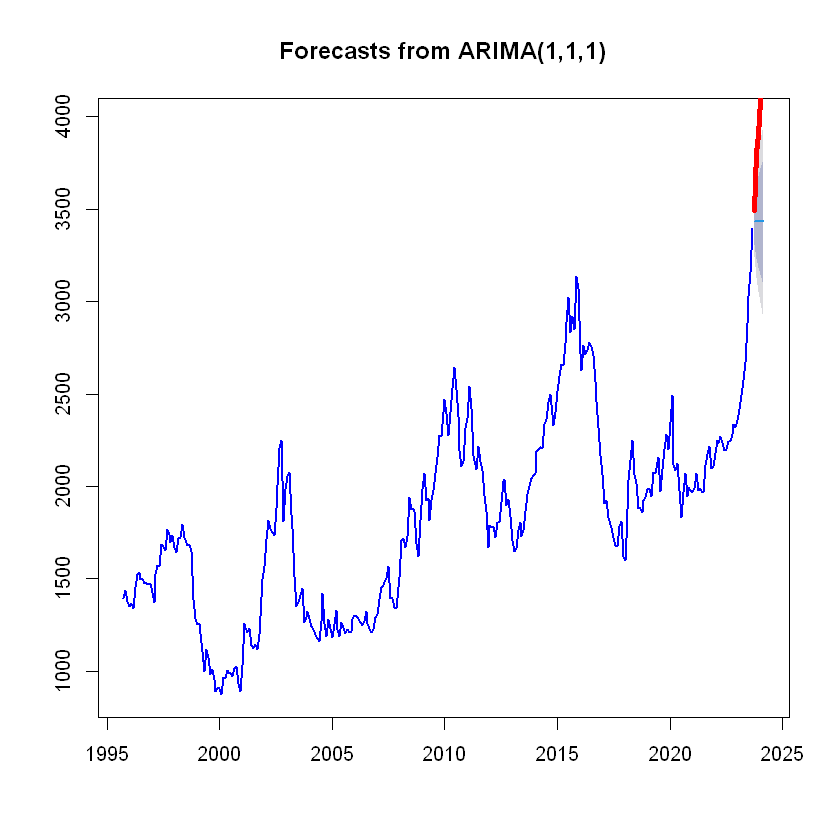

In [798]:
plot(forecast_arima, lw=2, col='blue')
x <- as.vector(time(train))
y <- arima_model$fitted
lines(x, y, col='black', lw=4)
x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=4)


In [799]:
forecast_arima

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3435.163 3308.780 3561.547 3241.876 3628.450
Nov 2023       3431.460 3235.149 3627.772 3131.228 3731.693
Dec 2023       3431.807 3185.964 3677.650 3055.822 3807.791
Jan 2024       3431.774 3144.718 3718.830 2992.760 3870.789
Feb 2024       3431.777 3108.733 3754.822 2937.723 3925.831
Mar 2024       3431.777 3076.369 3787.185 2888.227 3975.327

In [800]:
accuracy(forecast_arima, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.17454,98.47071,73.35418,0.1075145,4.084446,0.2406495,-0.002847536,NA
Test set,1070.21350,1498.96394,1070.21350,20.1653721,20.165372,3.5109972,0.384251138,1.999531


In [801]:
arima_model


Call:
arima(x = train, order = c(1, 1, 1))

Coefficients:
          ar1     ma1
      -0.0935  0.2821
s.e.   0.2007  0.1892

sigma^2 estimated as 9725:  log likelihood = -2013.43,  aic = 4032.86

In [802]:
accuracy(forecast_arima, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.17454,98.47071,73.35418,0.1075145,4.084446,0.2406495,-0.002847536,NA
Test set,1070.21350,1498.96394,1070.21350,20.1653721,20.165372,3.5109972,0.384251138,1.999531


In [803]:
adf.test(train)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 0.897   0.901
[2,]   1 0.604   0.818
[3,]   2 0.754   0.861
[4,]   3 0.767   0.865
[5,]   4 0.684   0.841
[6,]   5 0.764   0.864
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -0.576   0.848
[2,]   1 -1.049   0.681
[3,]   2 -0.858   0.748
[4,]   3 -0.857   0.749
[5,]   4 -0.988   0.703
[6,]   5 -0.894   0.735
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -1.86   0.636
[2,]   1 -2.43   0.393
[3,]   2 -2.17   0.506
[4,]   3 -2.16   0.508
[5,]   4 -2.35   0.429
[6,]   5 -2.20   0.490
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [804]:
ndiffs(train)

[1] 1

In [805]:
plot.acf.pacf <- function(ts)
{ layout(mat = matrix(c(1,1,2,3), 
                      nrow=2, ncol=2, byrow=TRUE))
  plot(ts)
  Acf(ts, main='ACF')
  Pacf(ts, main='PACF')
}

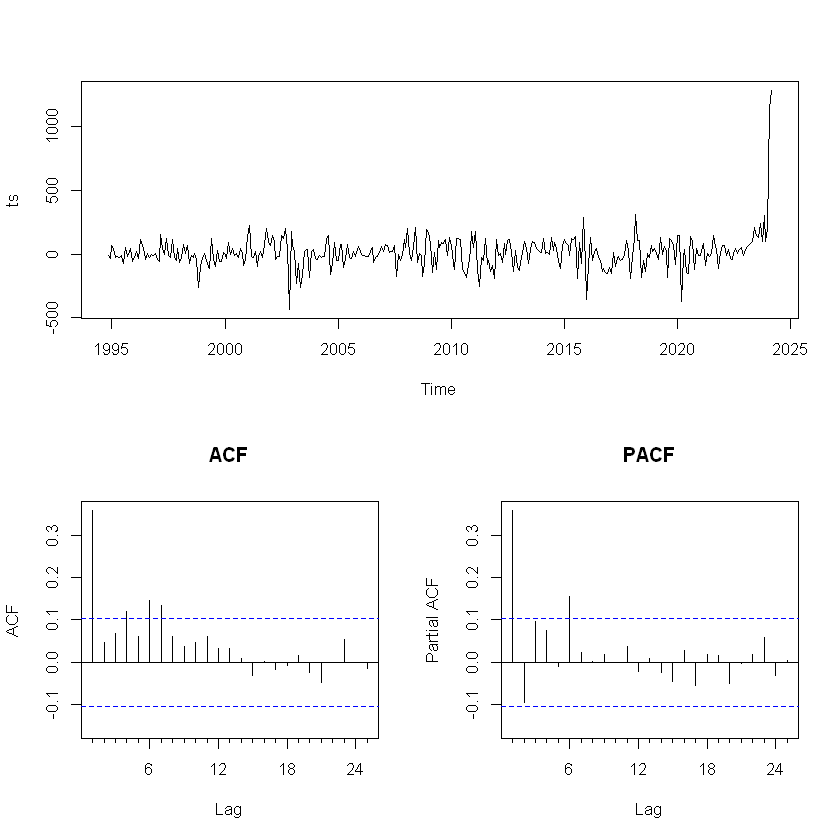

In [806]:
plot.acf.pacf(diff_cocoa_price_ts2)

In [807]:
arima_model <- arima(train, order=c(1,1,1))
arima_model


Call:
arima(x = train, order = c(1, 1, 1))

Coefficients:
          ar1     ma1
      -0.0935  0.2821
s.e.   0.2007  0.1892

sigma^2 estimated as 9725:  log likelihood = -2013.43,  aic = 4032.86

In [808]:
tail(arima_model)

$call
arima(x = train, order = c(1, 1, 1))

$series
[1] "train"

$code
[1] 0

$n.cond
[1] 0

$nobs
[1] 335

$model
$model$phi
[1] -0.09354634

$model$theta
[1] 0.2821358

$model$Delta
[1] 1

$model$Z
[1] 1 0 1

$model$a
[1]  238.58000   61.90149 3157.00000

$model$P
             [,1]         [,2]          [,3]
[1,] 0.000000e+00 0.000000e+00  3.204287e-23
[2,] 0.000000e+00 0.000000e+00  1.141545e-23
[3,] 3.204287e-23 1.141545e-23 -3.204287e-23

$model$T
            [,1] [,2] [,3]
[1,] -0.09354634    1    0
[2,]  0.00000000    0    0
[3,]  1.00000000    0    1

$model$V
          [,1]       [,2] [,3]
[1,] 1.0000000 0.28213582    0
[2,] 0.2821358 0.07960062    0
[3,] 0.0000000 0.00000000    0

$model$h
[1] 0

$model$Pn
              [,1]       [,2]          [,3]
[1,]  1.000000e+00 0.28213582 -8.417956e-24
[2,]  2.821358e-01 0.07960062  0.000000e+00
[3,] -8.417956e-24 0.00000000 -3.204287e-23



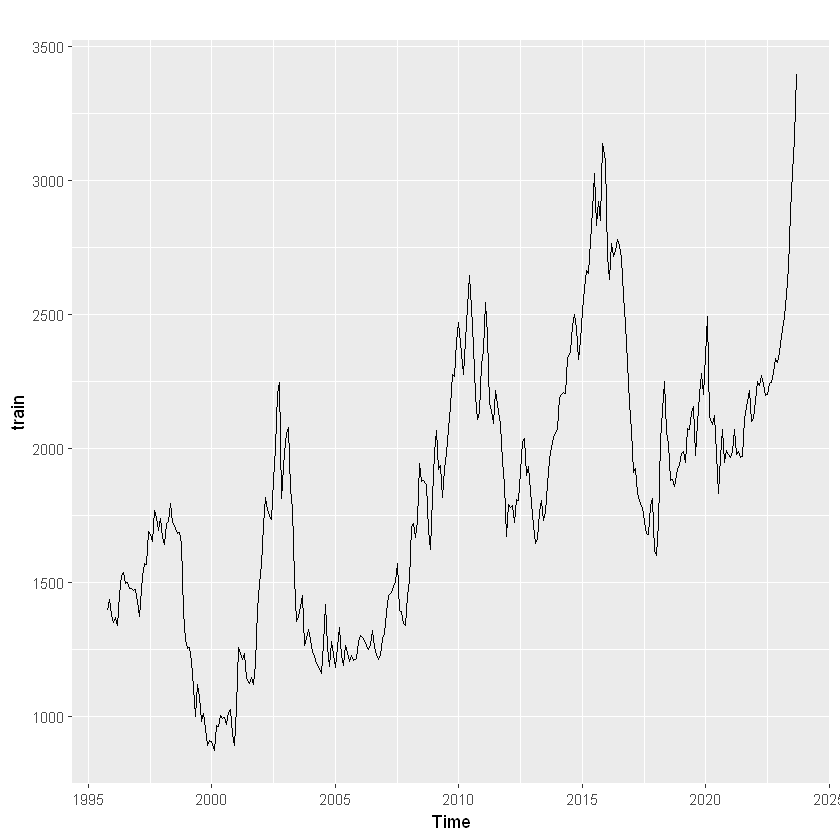

In [809]:
autoplot(train)

In [810]:
adf.test(train)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 0.897   0.901
[2,]   1 0.604   0.818
[3,]   2 0.754   0.861
[4,]   3 0.767   0.865
[5,]   4 0.684   0.841
[6,]   5 0.764   0.864
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -0.576   0.848
[2,]   1 -1.049   0.681
[3,]   2 -0.858   0.748
[4,]   3 -0.857   0.749
[5,]   4 -0.988   0.703
[6,]   5 -0.894   0.735
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -1.86   0.636
[2,]   1 -2.43   0.393
[3,]   2 -2.17   0.506
[4,]   3 -2.16   0.508
[5,]   4 -2.35   0.429
[6,]   5 -2.20   0.490
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [811]:
ndiffs(train)

[1] 1

In [812]:
First_diff <- train %>% diff()

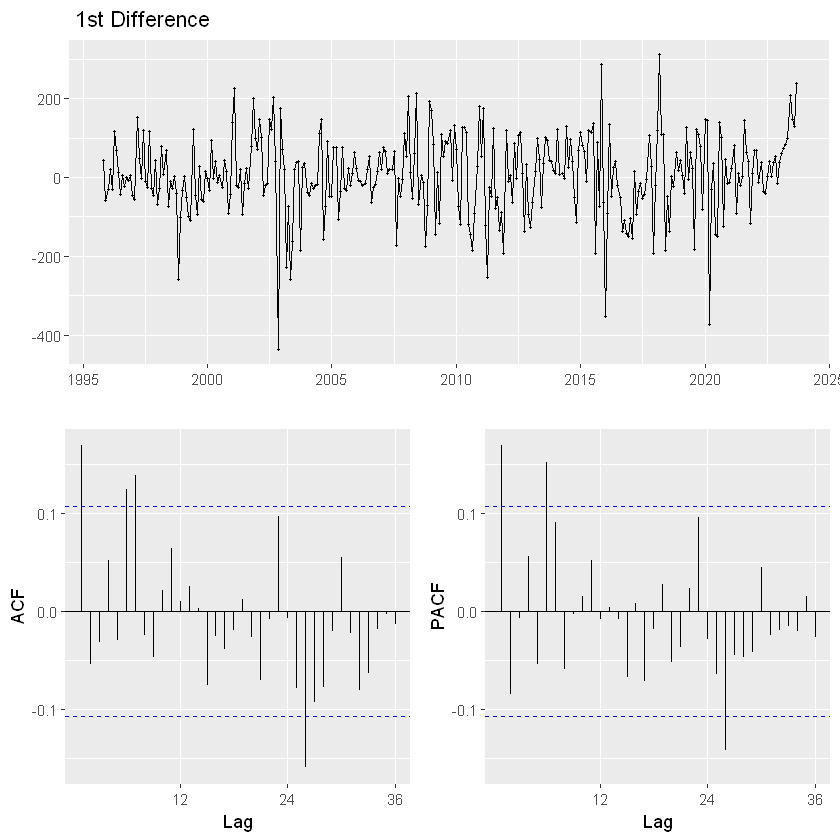

In [813]:
ggtsdisplay (First_diff,main=" 1st Difference")

## **Fitting the models**

**ARIMA(0,1,1)**

In [814]:
# Fit ARIMA(0,1,1) model
arima_011 <- Arima(train, order = c(0, 1, 1))

# Generate forecasts
forecast_arima_011 <- forecast:::forecast.Arima(arima_011, h = 6)

# Evaluate accuracy
accuracy_arima_011 <- round(accuracy(forecast_arima_011, test), 3)
accuracy_arima_011

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.091,98.498,73.285,0.107,4.085,0.240,-0.008,NA
Test set,1064.393,1494.456,1064.393,20.033,20.033,3.492,0.384,1.993


In [815]:
forecast_arima_011

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3438.114 3311.506 3564.722 3244.483 3631.744
Nov 2023       3438.114 3240.791 3635.436 3136.335 3739.892
Dec 2023       3438.114 3189.432 3686.795 3057.788 3818.440
Jan 2024       3438.114 3146.997 3729.231 2992.889 3883.339
Feb 2024       3438.114 3110.005 3766.223 2936.314 3939.913
Mar 2024       3438.114 3076.780 3799.447 2885.501 3990.726

In [816]:
summary(arima_011)

Series: train 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.1954
s.e.  0.0548

sigma^2 = 9760:  log likelihood = -2013.53
AIC=4031.05   AICc=4031.09   BIC=4038.68

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE
Training set 5.090612 98.49839 73.2851 0.1065705 4.084549 0.2404228
                     ACF1
Training set -0.008168717

**ARIMA(3,1,0)**

In [817]:
# Fit ARIMA(3,1,0) model
arima_310 <- Arima(train, order = c(3, 1, 0))

# Generate forecasts
forecast_arima_310 <- forecast:::forecast.Arima(arima_310, h = 6)

# Evaluate accuracy and round to 3 decimal places
accuracy_arima_310 <- round(accuracy(forecast_arima_310, test), 3)

# Print the accuracy measures
accuracy_arima_310


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.396,98.365,73.356,0.11,4.082,0.241,-0.002,NA
Test set,1089.242,1514.901,1089.242,20.59,20.590,3.573,0.385,2.024


In [818]:
forecast_arima_310

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3429.137 3302.321 3555.953 3235.188 3623.086
Nov 2023       3415.160 3218.235 3612.085 3113.990 3716.331
Dec 2023       3408.670 3164.317 3653.023 3034.965 3782.375
Jan 2024       3408.450 3126.338 3690.562 2976.997 3839.903
Feb 2024       3409.008 3093.762 3724.255 2926.881 3891.136
Mar 2024       3409.161 3063.835 3754.487 2881.031 3937.292

In [819]:
summary (arima_310)

Series: train 
ARIMA(3,1,0) 

Coefficients:
        ar1      ar2      ar3
      0.188  -0.0826  -0.0046
s.e.  0.055   0.0557   0.0552

sigma^2 = 9792:  log likelihood = -2013.07
AIC=4034.15   AICc=4034.27   BIC=4049.4

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 5.395675 98.36459 73.35635 0.1103345 4.081893 0.2406566
                     ACF1
Training set -0.001983463

**ARIMA(2,1,0)**

In [820]:
# Fit ARIMA(2,1,0) model
arima_210 <- Arima(train, order = c(2, 1, 0))

# Generate forecasts
forecast_arima_210 <- forecast:::forecast.Arima(arima_210, h = 6)

# Evaluate accuracy and round to 3 decimal places
accuracy_arima_210 <- round(accuracy(forecast_arima_210, test), 3)

# Print the accuracy measures
accuracy_arima_210


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.377,98.366,73.355,0.110,4.081,0.241,-0.003,NA
Test set,1087.266,1513.170,1087.266,20.547,20.547,3.567,0.384,2.021


In [821]:
forecast_arima_210

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3429.809 3303.182 3556.436 3236.149 3623.469
Nov 2023       3416.369 3219.697 3613.041 3115.585 3717.152
Dec 2023       3410.983 3166.979 3654.986 3037.812 3784.154
Jan 2024       3411.089 3129.130 3693.048 2979.869 3842.308
Feb 2024       3411.558 3096.216 3726.899 2929.284 3893.831
Mar 2024       3411.637 3066.023 3757.251 2883.066 3940.208

In [822]:
summary (arima_210)

Series: train 
ARIMA(2,1,0) 

Coefficients:
         ar1      ar2
      0.1884  -0.0834
s.e.  0.0548   0.0549

sigma^2 = 9763:  log likelihood = -2013.08
AIC=4032.15   AICc=4032.23   BIC=4043.6

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE
Training set 5.377018 98.36561 73.35471 0.1101504 4.08113 0.2406512
                     ACF1
Training set -0.002610904

**ARIMA(4,1,0)**

In [823]:
# Fit ARIMA(4,1,0) model
arima_410 <- Arima(train, order = c(4, 1, 0))

# Generate forecasts
forecast_arima_410 <- forecast:::forecast.Arima(arima_410, h = 6)

# Evaluate accuracy and round to 3 decimal places
accuracy_arima_410 <- round(accuracy(forecast_arima_410, test), 3)

# Print the accuracy measures
accuracy_arima_410


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.173,98.185,73.266,0.110,4.079,0.240,0.001,NA
Test set,1054.349,1482.282,1054.349,19.833,19.833,3.459,0.381,1.975


In [824]:
forecast_arima_410

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3441.276 3314.501 3568.052 3247.390 3635.163
Nov 2023       3438.681 3241.709 3635.654 3137.438 3739.925
Dec 2023       3438.981 3194.066 3683.896 3064.416 3813.546
Jan 2024       3453.094 3170.567 3735.622 3021.006 3885.183
Feb 2024       3458.563 3139.745 3777.380 2970.973 3946.152
Mar 2024       3458.350 3105.613 3811.088 2918.885 3997.815

In [825]:
summary (arima_410)

Series: train 
ARIMA(4,1,0) 

Coefficients:
         ar1      ar2      ar3     ar4
      0.1891  -0.0768  -0.0148  0.0609
s.e.  0.0549   0.0558   0.0558  0.0553

sigma^2 = 9786:  log likelihood = -2012.47
AIC=4034.94   AICc=4035.12   BIC=4054.01

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 5.173355 98.18476 73.26567 0.1095519 4.078971 0.2403591
                    ACF1
Training set 0.001126503

**ARIMA(3,1,1)**

In [826]:
# Fit ARIMA(3,1,1) model
arima_311 <- Arima(train, order = c(3, 1, 1))

# Generate forecasts
forecast_arima_311 <- forecast:::forecast.Arima(arima_311, h = 6)

# Evaluate accuracy and round to 3 decimal places
accuracy_arima_311 <- round(accuracy(forecast_arima_311, test), 3)

# Print the accuracy measures
accuracy_arima_311


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.484,98.145,73.000,0.112,4.070,0.239,0.004,NA
Test set,1095.478,1520.314,1095.478,20.728,20.728,3.594,0.385,2.032


In [827]:
forecast_arima_311

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3429.058 3302.334 3555.782 3235.251 3622.866
Nov 2023       3411.945 3215.173 3608.718 3111.008 3712.883
Dec 2023       3397.865 3153.168 3642.562 3023.633 3772.097
Jan 2024       3400.865 3120.828 3680.903 2972.585 3829.145
Feb 2024       3400.197 3087.849 3712.545 2922.501 3877.892
Mar 2024       3402.242 3061.112 3743.373 2880.529 3923.956

In [828]:
summary (arima_311)

Series: train 
ARIMA(3,1,1) 

Coefficients:
          ar1     ar2      ar3     ma1
      -0.5411  0.0616  -0.1065  0.7290
s.e.   0.2367  0.0745   0.0548  0.2327

sigma^2 = 9778:  log likelihood = -2012.33
AIC=4034.67   AICc=4034.85   BIC=4053.74

Training set error measures:
                   ME    RMSE      MAE       MPE    MAPE      MASE        ACF1
Training set 5.483682 98.1446 72.99999 0.1119815 4.06966 0.2394875 0.003594554

**ARIMA(2,1,1)**

In [829]:
# Fit ARIMA(2,1,1) model
arima_211 <- Arima(train, order = c(2, 1, 1))

# Generate forecasts
forecast_arima_211 <- forecast:::forecast.Arima(arima_211, h = 6)

# Evaluate accuracy and round to 3 decimal places
accuracy_arima_211 <- round(accuracy(forecast_arima_211, test), 3)

# Print the accuracy measures
accuracy_arima_211


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.390,98.365,73.355,0.110,4.082,0.241,-0.002,NA
Test set,1088.634,1514.376,1088.634,20.577,20.577,3.571,0.385,2.023


In [830]:
forecast_arima_211

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3429.354 3302.537 3556.171 3235.403 3623.304
Nov 2023       3415.543 3218.596 3612.490 3114.339 3716.747
Dec 2023       3409.401 3165.027 3653.774 3035.664 3783.137
Jan 2024       3409.257 3127.035 3691.479 2977.636 3840.879
Feb 2024       3409.776 3094.323 3725.229 2927.333 3892.220
Mar 2024       3409.906 3064.299 3755.513 2881.345 3938.467

In [831]:
summary (arima_211)

Series: train 
ARIMA(2,1,1) 

Coefficients:
         ar1      ar2      ma1
      0.2252  -0.0898  -0.0370
s.e.  0.4324   0.0910   0.4327

sigma^2 = 9792:  log likelihood = -2013.08
AIC=4034.15   AICc=4034.27   BIC=4049.41

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE
Training set 5.389504 98.36535 73.35491 0.110271 4.081583 0.2406519
                     ACF1
Training set -0.002263265

**ARIMA(4,1,1)**

In [832]:
# Fit ARIMA(4,1,1) model
arima_411 <- Arima(train, order = c(4, 1, 1))

# Generate forecasts
forecast_arima_411 <- forecast:::forecast.Arima(arima_411, h = 6)

# Evaluate accuracy and round to 3 decimal places
accuracy_arima_411 <- round(accuracy(forecast_arima_411, test), 3)

# Print the accuracy measures
accuracy_arima_411


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.187,97.901,72.611,0.110,4.041,0.238,0.001,NA
Test set,1057.954,1487.196,1057.954,19.901,19.901,3.471,0.382,1.982


In [833]:
forecast_arima_411

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3443.973 3317.373 3570.574 3250.355 3637.592
Nov 2023       3436.587 3239.341 3633.834 3134.924 3738.250
Dec 2023       3435.496 3190.121 3680.871 3060.228 3810.765
Jan 2024       3451.280 3168.527 3734.034 3018.846 3883.714
Feb 2024       3449.726 3129.325 3770.127 2959.715 3939.737
Mar 2024       3450.254 3096.874 3803.633 2909.806 3990.701

**SERIMA**

In [834]:
# Fit a SARIMA model using automatic selection
sarima_model <- forecast::auto.arima(train)

# Generate forecasts
forecast_sarima <- forecast:::forecast.Arima(sarima_model, h = 6)

# Calculate accuracy measures
accuracy_sarima <- accuracy(forecast_sarima, test)

# Print accuracy measures
accuracy_sarima


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.090612,98.49839,73.2851,0.1065705,4.084549,0.2404228,-0.008168717,NA
Test set,1064.392947,1494.45583,1064.3929,20.0328622,20.032862,3.4919020,0.384414805,1.992567


In [835]:
forecast_sarima

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3438.114 3311.506 3564.722 3244.483 3631.744
Nov 2023       3438.114 3240.791 3635.436 3136.335 3739.892
Dec 2023       3438.114 3189.432 3686.795 3057.788 3818.440
Jan 2024       3438.114 3146.997 3729.231 2992.889 3883.339
Feb 2024       3438.114 3110.005 3766.223 2936.314 3939.913
Mar 2024       3438.114 3076.780 3799.447 2885.501 3990.726

In [836]:
summary (arima_411)

Series: train 
ARIMA(4,1,1) 

Coefficients:
          ar1     ar2      ar3     ar4     ma1
      -0.3669  0.0296  -0.0642  0.0784  0.5616
s.e.   0.2409  0.0723   0.0610  0.0576  0.2364

sigma^2 = 9759:  log likelihood = -2011.51
AIC=4035.02   AICc=4035.28   BIC=4057.91

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 5.186521 97.90079 72.61147 0.1103038 4.040661 0.2382129
                     ACF1
Training set 0.0006009217

In [837]:
auto.arima(train)

Series: train 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.1954
s.e.  0.0548

sigma^2 = 9760:  log likelihood = -2013.53
AIC=4031.05   AICc=4031.09   BIC=4038.68


	Ljung-Box test

data:  Residuals
Q* = 20.824, df = 24, p-value = 0.6491

Model df: 0.   Total lags used: 24



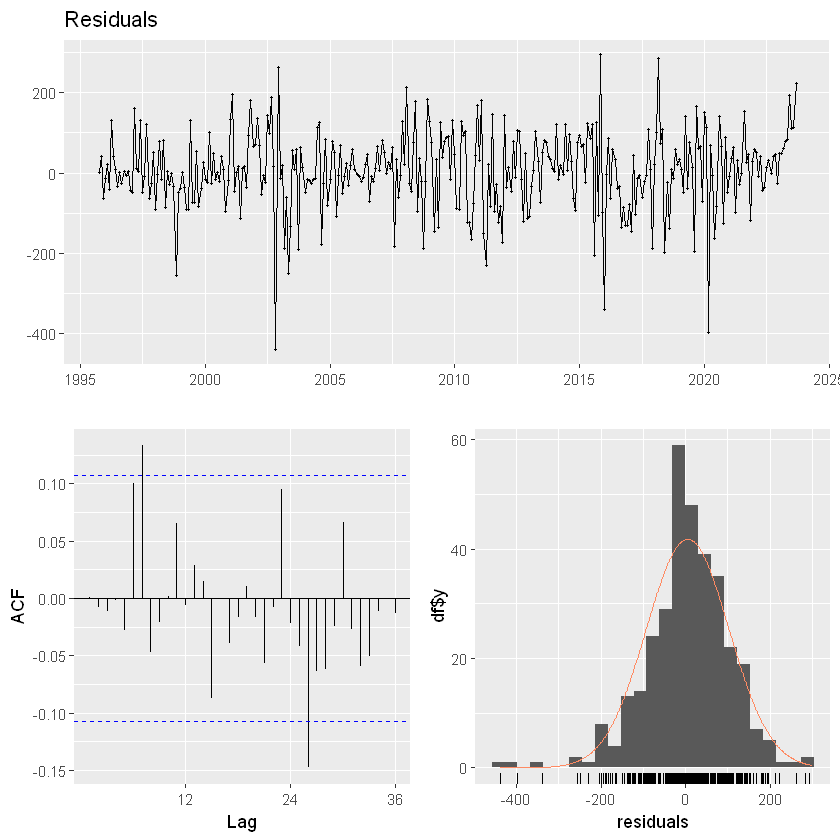

In [838]:
checkresiduals(forecast_arima_411$residuals)

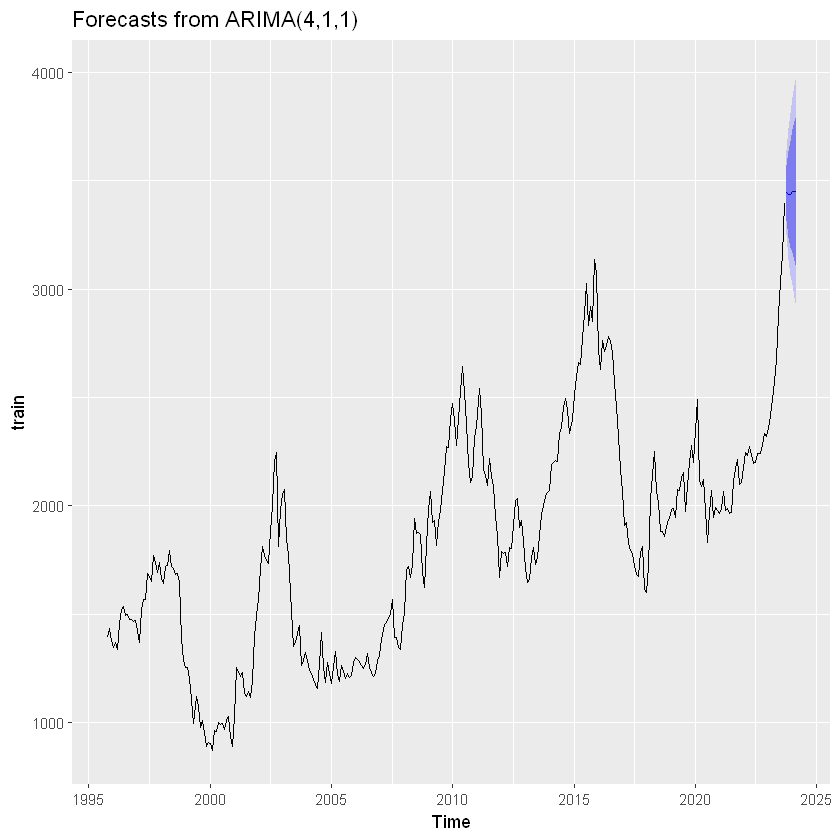

In [839]:
autoplot(forecast_arima_411)

## **EVALUATIONS OF ARIMA MODELS**

In [840]:
# Accuracy measures for each forecast
accuracy_arima_011 <- accuracy(forecast_arima_011, test)
accuracy_arima_310 <- accuracy(forecast_arima_310, test)
accuracy_arima_210 <- accuracy(forecast_arima_210, test)
accuracy_arima_410 <- accuracy(forecast_arima_410, test)
accuracy_arima_311 <- accuracy(forecast_arima_311, test)
accuracy_arima_211 <- accuracy(forecast_arima_211, test)
accuracy_arima_411 <- accuracy(forecast_arima_411, test)
accuracy_sarima <- accuracy(forecast_sarima, test)

In [841]:
# Round accuracy measures to three decimal places
accuracy_arima_011 <- round(accuracy_arima_011, 3)
accuracy_arima_310 <- round(accuracy_arima_310, 3)
accuracy_arima_210 <- round(accuracy_arima_210, 3)
accuracy_arima_410 <- round(accuracy_arima_410, 3)
accuracy_arima_311 <- round(accuracy_arima_311, 3)
accuracy_arima_211 <- round(accuracy_arima_211, 3)
accuracy_arima_411 <- round(accuracy_arima_411, 3)
accuracy_sarima <- round(accuracy_sarima, 3)

In [842]:
# Create a data frame to display the evaluation results
evaluation_results_arima_sarima <- data.frame(
  Model = c("ARIMA(0,1,1)", "ARIMA(3,1,0)", "ARIMA(2,1,0)", "ARIMA(4,1,0)", "ARIMA(3,1,1)", "ARIMA(2,1,1)", "ARIMA(4,1,1)", "SARIMA"),
  MAPE = c(accuracy_arima_011[2, 5], accuracy_arima_310[2, 5], accuracy_arima_210[2, 5], accuracy_arima_410[2, 5],
           accuracy_arima_311[2, 5], accuracy_arima_211[2, 5], accuracy_arima_411[2, 5], accuracy_sarima[2, 5]),
  MAE = c(accuracy_arima_011[2, 3], accuracy_arima_310[2, 3], accuracy_arima_210[2, 3], accuracy_arima_410[2, 3],
          accuracy_arima_311[2, 3], accuracy_arima_211[2, 3], accuracy_arima_411[2, 3], accuracy_sarima[2, 3]),
  RMSE = c(accuracy_arima_011[2, 2], accuracy_arima_310[2, 2], accuracy_arima_210[2, 2], accuracy_arima_410[2, 2],
           accuracy_arima_311[2, 2], accuracy_arima_211[2, 2], accuracy_arima_411[2, 2], accuracy_sarima[2, 2])
)

In [843]:
evaluation_results_arima_sarima

Model,MAPE,MAE,RMSE
<chr>,<dbl>,<dbl>,<dbl>
"ARIMA(0,1,1)",20.033,1064.393,1494.456
"ARIMA(3,1,0)",20.590,1089.242,1514.901
"ARIMA(2,1,0)",20.547,1087.266,1513.170
"ARIMA(4,1,0)",19.833,1054.349,1482.282
"ARIMA(3,1,1)",20.728,1095.478,1520.314
"ARIMA(2,1,1)",20.577,1088.634,1514.376
"ARIMA(4,1,1)",19.901,1057.954,1487.196
SARIMA,20.033,1064.393,1494.456


# **OVERALL TOP MODELS** 

In [844]:
# Combine all evaluation results
all_evaluation_results <- list(evaluation_results_simple, evaluation_results_exp_smoothing, evaluation_results_arima_sarima)
all_models <- unique(unlist(sapply(all_evaluation_results, function(df) df$Model)))

# Initialize a data frame to store mean MAPE for each model
mean_mape_df <- data.frame(Model = all_models, Mean_MAPE = rep(NA, length(all_models)))

# Calculate mean MAPE for each model across all methods
for (model in all_models) {
  mape_values <- numeric(length(all_evaluation_results))
  for (i in seq_along(all_evaluation_results)) {
    model_row <- which(all_evaluation_results[[i]]$Model == model)
    if (length(model_row) > 0) {
      mape_values[i] <- all_evaluation_results[[i]][model_row, "MAPE", ]
    }
  }
  mean_mape_df[mean_mape_df$Model == model, "Mean_MAPE"] <- mean(mape_values, na.rm = TRUE)
}

# Sort the mean MAPE data frame by Mean_MAPE in ascending order to get top models
top_models <- mean_mape_df[order(mean_mape_df$Mean_MAPE), ]

# Print the top models
top_models


,Model,Mean_MAPE
,<chr>,<dbl>
12,ETS (MMM),6.313667
11,ETS (AAA),6.603000
16,"ARIMA(4,1,0)",6.611000
19,"ARIMA(4,1,1)",6.633667
13,"ARIMA(0,1,1)",6.677667
20,SARIMA,6.677667
15,"ARIMA(2,1,0)",6.849000
9,Holt's Method,6.855333
18,"ARIMA(2,1,1)",6.859000


In [845]:
# Combine all evaluation results
all_evaluation_results <- list(evaluation_results_simple, evaluation_results_exp_smoothing, evaluation_results_arima_sarima)
all_models <- unique(unlist(sapply(all_evaluation_results, function(df) df$Model)))

# Initialize a data frame to store mean MAPE and RMSE for each model
mean_metrics_df <- data.frame(Model = all_models, Mean_MAPE = rep(NA, length(all_models)), Mean_RMSE = rep(NA, length(all_models)))

# Calculate mean MAPE and RMSE for each model across all methods
for (model in all_models) {
  mape_values <- numeric(length(all_evaluation_results))
  rmse_values <- numeric(length(all_evaluation_results))
  for (i in seq_along(all_evaluation_results)) {
    model_row <- which(all_evaluation_results[[i]]$Model == model)
    if (length(model_row) > 0) {
      mape_values[i] <- all_evaluation_results[[i]][model_row, "MAPE"]
      rmse_values[i] <- all_evaluation_results[[i]][model_row, "RMSE"]
    }
  }
  mean_metrics_df[mean_metrics_df$Model == model, "Mean_MAPE"] <- mean(mape_values, na.rm = TRUE)
  mean_metrics_df[mean_metrics_df$Model == model, "Mean_RMSE"] <- mean(rmse_values, na.rm = TRUE)
}

# Sort the mean metrics data frame by Mean_MAPE in ascending order to get top models
top_models_mape <- mean_metrics_df[order(mean_metrics_df$Mean_MAPE), ]
top_models_rmse <- mean_metrics_df[order(mean_metrics_df$Mean_RMSE), ]

# Print the top models based on MAPE
print("Top Models based on MAPE:")
print(top_models_mape)

# Print the top models based on RMSE
print("\nTop Models based on RMSE:")
print(top_models_rmse)


[1] "Top Models based on MAPE:"
                                         Model Mean_MAPE Mean_RMSE
12                                   ETS (MMM)  6.313667  454.2637
11                                   ETS (AAA)  6.603000  482.3317
16                                ARIMA(4,1,0)  6.611000  494.0940
19                                ARIMA(4,1,1)  6.633667  495.7320
13                                ARIMA(0,1,1)  6.677667  498.1520
20                                      SARIMA  6.677667  498.1520
15                                ARIMA(2,1,0)  6.849000  504.3900
9                                Holt's Method  6.855333  500.9107
18                                ARIMA(2,1,1)  6.859000  504.7920
4                                        Drift  6.860000  501.1700
14                                ARIMA(3,1,0)  6.863333  504.9670
17                                ARIMA(3,1,1)  6.909333  506.7713
2                                        Naive  7.006667  508.3467
5                 Simple Expon

In [846]:
# Combine all evaluation results
all_evaluation_results <- list(evaluation_results_simple, evaluation_results_exp_smoothing, evaluation_results_arima_sarima)

# Combine into one data frame
all_results <- do.call(rbind, all_evaluation_results)

# Find the overall top model based on lowest MAPE
overall_top_model <- all_results[which.min(all_results$MAPE), ]

# Print the overall top model
print("Overall Top Model:")
(overall_top_model)


[1] "Overall Top Model:"


,Model,MAPE,MAE,RMSE
,<chr>,<dbl>,<dbl>,<dbl>
12,ETS (MMM),18.941,993.893,1362.791
